## Описание работы

* Анализ итогов проведения 30-ти дневных рекламных кампаний. Рекламные кампании проводились в разных частях мира пятью разными компаниями - медиабайерами.


* Рекламировалось мобильное приложение.


* В работе представлен анализ рекламных кампаний в целом, в разрезе регионов проведения рекламных кампаний, в разрезе медиабайеров, сравнительный анализ. После каждого раздела представлены выводы. Работу подытоживает общий вывод и рекомендации.

## Описание исходных данных


В файле представлены данные по работе рекламных кампаний, запущенных пятью медиабайерами для привлечения пользователей в приложение. 


Имеющиеся поля:


* Campaign_id - ID кампании;
* Geo - геопозиция, на которую настроена рекламная кампания;
* Buyer - байер, выполнивший запуск;
* Impressions - количество показов рекламных объявлений;
* Clicks - количество кликов;
* Installs - количество установок;
* Registrations - количество регистраций;
* Spend - Затраченная сумма;
* Revenue_ad (1d/7d/30d) - Выручка с рекламы от пользователей, зарегистрировавшихся в приложении, на 1/7/30 день их жизни
* Revenue_in_app (1d/7d/30d) - Выручка с покупок от пользователей, зарегистрировавшихся в приложении, на 1/7/30 день их жизни
* Payers (1d/7d/30d) - Количество покупателей в приложении на 1/7/30 день их жизни

## Открытие файла с данными и изучение общей информации

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [3]:
# Открытие и просмотр файла

data = pd.read_csv('test_data_topface.csv', sep=',', decimal=',')
pd.set_option('display.max_columns', 100)

data.head()

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d
0,1,north america,buyer_1,3456974,129508,33054,21932,3208.440002,1163.521408,162.220001,64,1381.310062,199.749999,79,1527.013835,276.629998,83
1,2,north america,buyer_2,245542,6306,3401,2448,1569.519999,833.059639,37.250000,17,1200.964697,69.340001,19,1449.001828,120.250001,22
2,3,north america,buyer_1,1281103,35724,13315,8101,1231.999998,459.682600,3.260000,4,524.987826,24.700000,6,572.633765,24.700000,6
3,4,north america,buyer_1,215538,9987,3119,1857,1228.129999,602.778160,26.130000,11,830.113889,33.439999,12,1042.831595,57.530002,12
4,5,western europe,buyer_2,335878,7343,3952,2955,872.570005,427.807238,19.030001,4,577.039081,20.640001,5,714.554179,32.150001,6


In [4]:
# Просмотр информации о данных в таблице

data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Campaign_id        87 non-null     int64  
 1   Geo                87 non-null     object 
 2   Buyer              87 non-null     object 
 3   Impressions        87 non-null     int64  
 4   Clicks             87 non-null     int64  
 5   Installs           87 non-null     int64  
 6   Registrations      87 non-null     int64  
 7   Spend              87 non-null     float64
 8   Revenue_ad1d       87 non-null     float64
 9   Revenue_in_app1d   87 non-null     float64
 10  Payers1d           87 non-null     int64  
 11  Revenue_ad7d       87 non-null     float64
 12  Revenue_in_app7d   87 non-null     float64
 13  Payers7d           87 non-null     int64  
 14  Revenue_ad30d      87 non-null     float64
 15  Revenue_in_app30d  87 non-null     float64
 16  Payers30d          87 non-nu

In [5]:
# Подсчёт количества уникальных рекламных кампаний

data['Campaign_id'].nunique()

87

Каждая уникальная строка исходной таблицы соответствует уникальной рекламной кампании.


In [6]:
# Распределение кампаний по регионам мира (геопозициям)

data['Geo'].value_counts()

north america        48
western europe       22
cis                  10
latin america         3
north africa          2
tropical africa       1
australia oceania     1
Name: Geo, dtype: int64

Самый популярный регион проведения кампаний - Северная Америка, где было проведено 48 кампаний. Далее в порядке убывания числа проведённых кампаний следуют: Западная Европа (2 кампании), страны СНГ (10 кампаний), Латинская Америка (3 кампании), Северная Африка (2 кампании), Тропическая Африка ( 1 кампания), Австралия и Океания (1 кампания). 

In [7]:
# Распределение кампаний по закупщикам рекламы (байерам)

data['Buyer'].value_counts()

buyer_2    39
buyer_1    18
buyer_4    16
buyer_5     8
buyer_3     6
Name: Buyer, dtype: int64

Самое большое число запусков кампаний совершил байер 2 - (39 запусков), далее в порядке убывания запущенных кампаний следуют: байер 1 - (18 запусков), байер 4 - (16 запусков), байер 5 - (8 запусков), байер 3 - (6 запусков).


In [8]:
# Просмотр частотного распределения количества показов рекламных объявлений

data['Impressions'].describe()

count    8.700000e+01
mean     1.140572e+05
std      3.989255e+05
min      2.185000e+03
25%      1.057700e+04
50%      2.619300e+04
75%      7.088950e+04
max      3.456974e+06
Name: Impressions, dtype: float64

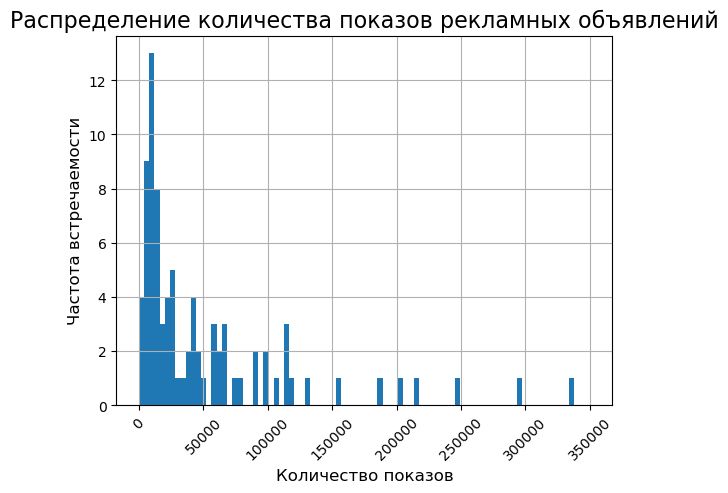

In [9]:
# Построение гистограммы частотного распределения количества показов рекламных объявлений
# По оси Х распологаются значения количества показов
# По оси У отмечена частота встречаемости конкретного значения количества показов

data['Impressions'].hist(bins=87, range=(0, 350000))
plt.rcParams["figure.figsize"] = (10, 6)
plt.xticks(rotation=45)
plt.title('Распределение количества показов рекламных объявлений', fontsize=16)
plt.xlabel('Количество показов', fontsize=12)
plt.ylabel('Частота встречаемости', fontsize=12)
plt.show()


Каждая рекалманая кампания характеризуется своим уникальным числом показов рекламных кампаний. Кампании резко отличаются по числу показов. Минимальное число показов - 2185, максимальное число - почти 3,5 миллиона показов, медианное значение количества показов в целом - чуть более 26 тысяч.




In [10]:
# Просмотр частотного распределения количества кликов рекламных объявлений

data['Clicks'].describe()

count        87.000000
mean       3804.494253
std       14610.898115
min          53.000000
25%         276.500000
50%         724.000000
75%        2063.500000
max      129508.000000
Name: Clicks, dtype: float64

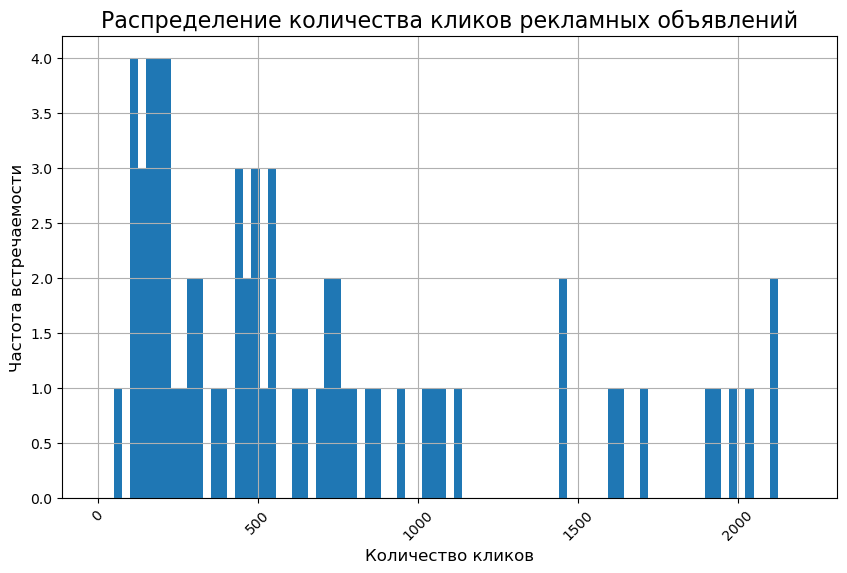

In [11]:
# Построение гистограммы частотного распределения количества кликов рекламных объявлений
# По оси Х распологаются значения количества кликов
# По оси У отмечена частота встречаемости конкретного значения количества кликов

data['Clicks'].hist(bins=87, range=(0, 2200))
plt.rcParams["figure.figsize"] = (10, 6)
plt.xticks(rotation=45)
plt.title('Распределение количества кликов рекламных объявлений', fontsize=16)
plt.xlabel('Количество кликов', fontsize=12)
plt.ylabel('Частота встречаемости', fontsize=12)
plt.show()

Рекламные кампании сильно отличаются по кликабельности, т.е. успешности. Вероятно, основная масса рекламных кампаний была признана неуспешной, т.к. 75% рекламных кампаний набрало 2000 кликов или меньше, половина кампаний набрало менее 800 кликов. Самая успешная рекламная кампания набрала почти 130 тысяч кликов. Клик (отклик) на рекламное объявление в рекламной кампании является первым шагом в воронке событий, две последующие гистограммы иллюстрируют следующие за кликом шаги воронки событий, - по этой причине формы гистограмм похожи.


In [12]:
# Просмотр частотного распределения количества установок 
# (инсталляций приложения в зависимости от рекламной кампании)

data['Installs'].describe()

count       87.000000
mean      1211.850575
std       3883.087208
min         10.000000
25%        107.500000
50%        258.000000
75%        763.500000
max      33054.000000
Name: Installs, dtype: float64

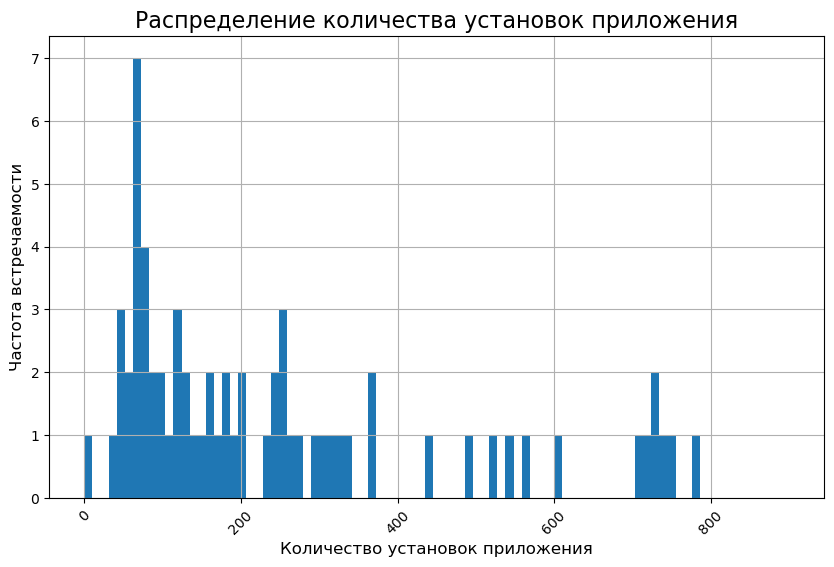

In [13]:
# Построение гистограммы частотного распределения количества установок приложения
# По оси Х распологаются значения количества установок приложения
# По оси У отмечена частота встречаемости конкретного значения количества установок приложения

data['Installs'].hist(bins=87, range=(0, 900))
plt.rcParams["figure.figsize"] = (10, 6)
plt.xticks(rotation=45)
plt.title('Распределение количества установок приложения', fontsize=16)
plt.xlabel('Количество установок приложения', fontsize=12)
plt.ylabel('Частота встречаемости', fontsize=12)
plt.show()


Рекламные кампании отличаются успешностью по количеству целевых действий - установки приложения. Самая неуспешная рекламная кампания характеризуется десятью установками, результатом самой успешной рекламной кампании стало более 33 тысяч случаев установки приложения. Большая часть рекламных кампаний привело к не более тысячи случаев установки приложения.



In [14]:
# Просмотр частотного распределения количества регистраций в приложении 

data['Registrations'].describe()

count       87.000000
mean       769.057471
std       2577.564690
min          2.000000
25%         44.500000
50%        147.000000
75%        501.500000
max      21932.000000
Name: Registrations, dtype: float64

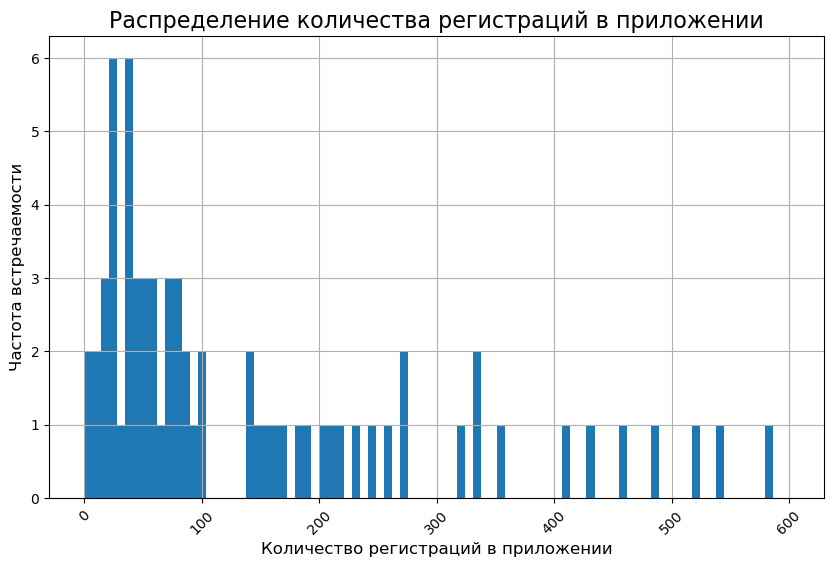

In [15]:
# Построение гистограммы частотного распределения количества регистраций в приложении
# По оси Х распологаются значения количества регистраций в приложении
# По оси У отмечена частота встречаемости конкретного значения количества регистраций в приложении

data['Registrations'].hist(bins=87, range=(0, 600))
plt.rcParams["figure.figsize"] = (10, 6)
plt.xticks(rotation=45)
plt.title('Распределение количества регистраций в приложении', fontsize=16)
plt.xlabel('Количество регистраций в приложении', fontsize=12)
plt.ylabel('Частота встречаемости', fontsize=12)
plt.show()

Рекламные кампании также отличаются успешностью по количеству регистраций в приложении, - следующему за установкой приложения целевым действием. Гистограмма частотного распределения количества регистраций в приложении повторяет форму гистограммы частотного распределения количества установок приложения, т.к. это следующее действие в воронке событий. Самым успешным с точки зрения установки приложения рекламным кампаниям соответствуют пики по количеству регистраций в приложении. Самая неуспешная рекламная кампания характеризуется двумя регистрациями, результатом самой успешной рекламной кампании стало почти 22 тысячи регистрации в приложении. Большая часть рекламных кампаний привело к не более нескольких сотен регистраций в приложении.



In [16]:
# Просмотр характера трат на рекламные кампании

data['Spend'].describe()

count      87.000000
mean      208.878506
std       424.243533
min        20.410000
25%        27.680000
50%        73.160000
75%       191.175001
max      3208.440002
Name: Spend, dtype: float64

In [17]:
# Подсчёт общей суммы затрат на все 87 рекламных кампаний

data['Spend'].sum()

18172.430007

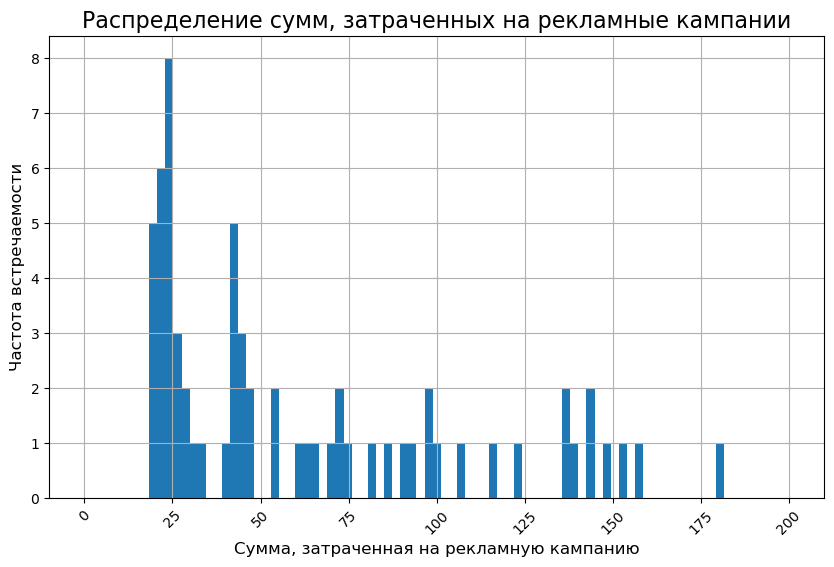

In [18]:
# Построение гистограммы частотного распределения сумм, затраченных на рекламные кампании
# По оси Х распологаются значения сумм, затраченных на рекламные кампании
# По оси У отмечена частота встречаемости конкретной суммы, затраченной на рекламную кампанию

data['Spend'].hist(bins=87, range=(0, 200))
plt.rcParams["figure.figsize"] = (10, 6)
plt.xticks(rotation=45)
plt.title('Распределение сумм, затраченных на рекламные кампании', fontsize=16)
plt.xlabel('Сумма, затраченная на рекламную кампанию', fontsize=12)
plt.ylabel('Частота встречаемости', fontsize=12)
plt.show()

На все, представленные в исходном датасете, 87 рекламные кампании было затрачено 18172.43 денежных единиц. Минимальная сумма затрат на рекламную кампанию - 20.41 ед., максимальная сумма - 3208.44 ед. В большей части рекламных кампаний было потрачено менее 200 денежных единиц.


Судя по количеству показов, кликов, затраченным суммам, масштаб рекламных кампаний был небольшой, возможно, это были пробные, тестовые рекламные кампани. 


В описании к данным отсутствует обозначение денежных единиц, также, нет данных о необходимой точности рассчётов. Поэтому, данные исходного датасета в колонке "Spend" округлять я не стал. Однако, сопоставляя количественные характеристики рекламных кампаний (цена показа, цена регистрации в приложении) я принял решение здесь и в дальнейших рассчётах округлять денежные единицы до второго знака после запятой для конкретных случаев, и до четвёртого знака после запятой при рассчётах средних показателей.


## Анализ рекламных кампаний по регионам

In [19]:
# Введение показателей конверсии:

# Конверсии показов в клики

data['CTR'] = round(data['Clicks']/data['Impressions'], 2)*100

# Конверсия кликов в установки приложения

data['CTI'] = round(data['Installs']/data['Clicks'], 2)*100

# Конверсия кликов в регистрацию приложения

data['CR'] = round(data['Registrations']/data['Clicks'], 2)*100

In [20]:
# Добавление в датасет столбца со средней стоимостью регистрации - CAC

data['CAC'] = round(data['Spend']/data['Registrations'], 2)

# Добавление в датасет столбца со средней ценностью клиента - LTV

data['LTV'] = round((data['Revenue_ad30d'] + data['Revenue_in_app30d'])\
                        /data['Registrations'], 2)

# Добавление в датасет столбца со средним возвратом на инвестиции - ROI

data['ROI'] = round(data['LTV']/data['CAC'], 3)

In [21]:
# Для корректных расчётов заменю в столбцах нули на NaN

data['Payers7d'] = data['Payers7d'].replace({'0':np.nan, 0:np.nan})

data['Payers30d'] = data['Payers30d'].replace({'0':np.nan, 0:np.nan})

In [22]:
# Добавление в датасет столбца с выручкой на пользователея, совершившего хотя бы одну покупку - ARPPU

data['ARPPU'] = round((data['Revenue_ad30d'] + data['Revenue_in_app30d'])/data['Payers30d'], 2)

In [23]:
# Добавление в датасет столбца с показателем динамики покупательской активности пользователя -
# Отношение суммарной выручки на 30-ый день к суммарной выручке на 7-ой день

data['dynamic_revenue'] = round(
    (data['Revenue_ad30d'] + data['Revenue_in_app30d'])/\
    (data['Revenue_ad7d'] + data['Revenue_in_app7d']), 2)

In [24]:
# Добавление в датасет столбца с показателем динамики убывания количества платящих пользователей -
# Отношение количества платящих пользователей на 30-ый день к аналогичному количеству на 7-ой день

data['dynamic_payers'] = round(data['Payers30d']/data['Payers7d'], 2)

При расчёте и анализе ряда продуктовых метрик оказывается, что разные рекламные кампании имеют свои плюсы и свои минусы. Низкая стоимость привлечения, стоимость регистрации не обеспечивает высокую окупаемость, кампании с высокой окупаемостью не всегда обеспечивают высокий процент удержания платящей аудитории, высокий процент конверсии в регистрацию не обеспечивает высокую долю платящих пользователей.


Продуктовая метрика ROI - возврат на инвестиции - прямо указывает на степень окупаемости рекламной кампании. Однако, кампании, численность платящей аудитории которых к 30-му равна нулю, вероятно,  более не принесут прибыли, т.к. привлечённые через эту кампанию платящие пользователи, или покинули приложение, или перестали пользоваться платными опциями. В этом случае источник выручки оказался краткосрочным.


Для возможности прогнозирования выручки в будущем я ввёл метрики, отражающие динамику изменения параметров:

* dynamic_revenue - отношения суммарной (выручка и с покупок, и с рекламы) выручки на 30-ый день к суммарной выручке на 7-ой день - единица измерения - доля;

* dynamic_payers - падение числа платящих пользователей с 7-ого по 30-ый день  - единица измерения - доля.


In [25]:
data.sort_values(by='ROI', ascending=False).head()

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d,CTR,CTI,CR,CAC,LTV,ROI,ARPPU,dynamic_revenue,dynamic_payers
62,63,north america,buyer_4,8164,118,64,77,29.920000,34.161366,0.00,0,43.789066,0.00,NaN,67.051895,0.00,NaN,1.0,54.0,65.0,0.39,0.87,2.231,NaN,1.53,NaN
29,30,western europe,buyer_2,49131,1449,723,461,137.100000,131.065869,0.00,0,181.802195,0.72,1.0,293.140940,0.72,1.0,3.0,50.0,32.0,0.30,0.64,2.133,293.86,1.61,1.00
7,8,north america,buyer_3,113917,3966,1249,854,521.509998,306.853212,30.78,2,484.534634,39.17,3.0,770.979189,47.56,4.0,3.0,31.0,22.0,0.61,0.96,1.574,204.63,1.56,1.33
84,85,western europe,buyer_4,27422,358,113,71,20.430000,8.895793,0.00,0,19.731451,0.00,NaN,30.783903,0.00,NaN,1.0,32.0,20.0,0.29,0.43,1.483,NaN,1.56,NaN
30,31,north america,buyer_4,27598,880,335,270,136.879999,100.510319,6.26,4,155.663275,6.26,4.0,192.697524,9.75,4.0,3.0,38.0,31.0,0.51,0.75,1.471,50.61,1.25,1.00


### Анализ рекламных кампаний в Северной Америке

In [26]:
# Выделение в отдельный датасет рекламных кампаний в Северной Америке

data_namerica = data.query('Geo == "north america"')

# Вывод верхних строчек - строчки с самым большим показателем окупаемости рекламы

data_namerica.sort_values(by='ROI', ascending=False).head(10)

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d,CTR,CTI,CR,CAC,LTV,ROI,ARPPU,dynamic_revenue,dynamic_payers
62,63,north america,buyer_4,8164,118,64,77,29.920000,34.161366,0.00,0,43.789066,0.000000,NaN,67.051895,0.000000,NaN,1.0,54.0,65.0,0.39,0.87,2.231,NaN,1.53,NaN
7,8,north america,buyer_3,113917,3966,1249,854,521.509998,306.853212,30.78,2,484.534634,39.170000,3.0,770.979189,47.560000,4.0,3.0,31.0,22.0,0.61,0.96,1.574,204.63,1.56,1.33
30,31,north america,buyer_4,27598,880,335,270,136.879999,100.510319,6.26,4,155.663275,6.260000,4.0,192.697524,9.750000,4.0,3.0,38.0,31.0,0.51,0.75,1.471,50.61,1.25,1.00
32,33,north america,buyer_4,21635,475,238,202,116.750000,81.319929,17.47,2,107.925810,18.160001,2.0,134.986309,26.550001,2.0,2.0,50.0,43.0,0.58,0.80,1.379,80.77,1.28,1.00
24,25,north america,buyer_3,21178,636,239,183,153.510000,113.351948,0.69,1,148.397449,1.380000,2.0,203.260172,2.810000,4.0,3.0,38.0,29.0,0.84,1.13,1.345,51.52,1.38,2.00
68,69,north america,buyer_4,41822,734,326,248,24.629999,17.929136,0.54,1,20.033737,0.540000,1.0,20.319256,8.440000,2.0,2.0,44.0,34.0,0.10,0.12,1.200,14.38,1.40,2.00
63,64,north america,buyer_4,5070,215,63,57,28.230000,17.150673,9.77,2,20.167320,10.460000,2.0,20.453054,10.460000,2.0,4.0,29.0,27.0,0.50,0.54,1.080,15.46,1.01,1.00
1,2,north america,buyer_2,245542,6306,3401,2448,1569.519999,833.059639,37.25,17,1200.964697,69.340001,19.0,1449.001828,120.250001,22.0,3.0,54.0,39.0,0.64,0.64,1.000,71.33,1.24,1.16
23,24,north america,buyer_1,201923,16025,2836,1944,156.430002,92.957284,11.29,4,117.630269,12.400000,5.0,129.256093,20.039999,5.0,8.0,18.0,12.0,0.08,0.08,1.000,29.86,1.15,1.00
10,11,north america,buyer_3,58686,1984,749,518,409.690001,163.803575,12.53,6,251.676735,13.910000,8.0,390.541706,15.290000,10.0,3.0,38.0,26.0,0.79,0.78,0.987,40.58,1.53,1.25


В результате вышеизложенного анализа и расчётов я выбрал 5 метрик, по которым сформирую список с самыми эффективными рекламными кампаниями. 


Из-за недостатка данных я не могу оценить сложную динамику процесса изменения поведения пользователей, не знаю отличий аудиторий, привлечённых разными рекламными кампаниями, нет в данных и сведений о сезоне проведения рекламных кампаний, т.е., всего того, что может сильно повлиять на лидера в эффективности рекламной кампании. Часть кампаний могут окупиться при условии продолжения пользователями пользования приложением (т.е., сохранять прежнее поведение) и продолжении работы приложения.


Верхнюю строчку занимает рекламная кампания №63, со значением параметра ROI более 2. Однако, в аудитории этой кампании нет платящих пользователей, при этом выручка продолжает расти весь 30-ти дневный период. Недостаток информации не позволяет в полной мере осознать и описать механизм выручки от рекламной кампании. Поэтому введённые мной показатели динамики здесь являются справочными, а эффективность рекламных кампаний в этом исследовании я оцениваю только на основе значения метрики ROI.


In [27]:
# Распределение кампаний по закупщикам рекламы (байерам)

data_namerica['Buyer'].value_counts()

buyer_2    17
buyer_1    12
buyer_4    11
buyer_3     6
buyer_5     2
Name: Buyer, dtype: int64

In [28]:
# Вывод окупившихся рекламных кампаний

data_namerica_top = data_namerica.query('ROI >=1').sort_values(by='ROI', ascending=False)
data_namerica_top

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d,CTR,CTI,CR,CAC,LTV,ROI,ARPPU,dynamic_revenue,dynamic_payers
62,63,north america,buyer_4,8164,118,64,77,29.920000,34.161366,0.00,0,43.789066,0.000000,NaN,67.051895,0.000000,NaN,1.0,54.0,65.0,0.39,0.87,2.231,NaN,1.53,NaN
7,8,north america,buyer_3,113917,3966,1249,854,521.509998,306.853212,30.78,2,484.534634,39.170000,3.0,770.979189,47.560000,4.0,3.0,31.0,22.0,0.61,0.96,1.574,204.63,1.56,1.33
30,31,north america,buyer_4,27598,880,335,270,136.879999,100.510319,6.26,4,155.663275,6.260000,4.0,192.697524,9.750000,4.0,3.0,38.0,31.0,0.51,0.75,1.471,50.61,1.25,1.00
32,33,north america,buyer_4,21635,475,238,202,116.750000,81.319929,17.47,2,107.925810,18.160001,2.0,134.986309,26.550001,2.0,2.0,50.0,43.0,0.58,0.80,1.379,80.77,1.28,1.00
24,25,north america,buyer_3,21178,636,239,183,153.510000,113.351948,0.69,1,148.397449,1.380000,2.0,203.260172,2.810000,4.0,3.0,38.0,29.0,0.84,1.13,1.345,51.52,1.38,2.00
68,69,north america,buyer_4,41822,734,326,248,24.629999,17.929136,0.54,1,20.033737,0.540000,1.0,20.319256,8.440000,2.0,2.0,44.0,34.0,0.10,0.12,1.200,14.38,1.40,2.00
63,64,north america,buyer_4,5070,215,63,57,28.230000,17.150673,9.77,2,20.167320,10.460000,2.0,20.453054,10.460000,2.0,4.0,29.0,27.0,0.50,0.54,1.080,15.46,1.01,1.00
1,2,north america,buyer_2,245542,6306,3401,2448,1569.519999,833.059639,37.25,17,1200.964697,69.340001,19.0,1449.001828,120.250001,22.0,3.0,54.0,39.0,0.64,0.64,1.000,71.33,1.24,1.16
23,24,north america,buyer_1,201923,16025,2836,1944,156.430002,92.957284,11.29,4,117.630269,12.400000,5.0,129.256093,20.039999,5.0,8.0,18.0,12.0,0.08,0.08,1.000,29.86,1.15,1.00


In [29]:
# Выделение в отдельный датасет потенциально окупающихся рекламных кампаний в Северной Америке

data_namerica_pretop = data_namerica.query('1 > ROI > 0.8')

# Вывод

data_namerica_pretop.sort_values(by='dynamic_revenue', ascending=False)

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d,CTR,CTI,CR,CAC,LTV,ROI,ARPPU,dynamic_revenue,dynamic_payers
10,11,north america,buyer_3,58686,1984,749,518,409.690001,163.803575,12.530000,6,251.676735,13.910000,8.0,390.541706,15.290000,10.0,3.0,38.0,26.0,0.79,0.78,0.987,40.58,1.53,1.25
19,20,north america,buyer_4,39441,730,291,231,233.390001,96.156985,2.080000,2,132.120541,2.080000,2.0,187.258096,4.860000,2.0,2.0,40.0,32.0,1.01,0.83,0.822,96.06,1.43,1.00
8,9,north america,buyer_2,65516,1717,905,685,460.330000,186.115059,25.129999,6,274.565038,29.999999,9.0,352.509658,60.350000,10.0,3.0,53.0,40.0,0.67,0.60,0.896,41.29,1.36,1.11
3,4,north america,buyer_1,215538,9987,3119,1857,1228.129999,602.778160,26.130000,11,830.113889,33.439999,12.0,1042.831595,57.530002,12.0,5.0,31.0,19.0,0.66,0.59,0.894,91.70,1.27,1.00
11,12,north america,buyer_2,59889,2024,1064,583,405.509998,181.964882,3.470000,2,280.528092,3.470000,2.0,339.694637,7.640000,3.0,3.0,53.0,29.0,0.70,0.60,0.857,115.78,1.22,1.50
28,29,north america,buyer_2,18125,628,307,159,138.649998,53.385560,0.000000,0,104.992718,0.000000,NaN,117.297491,8.390000,1.0,3.0,49.0,25.0,0.87,0.79,0.908,125.69,1.20,NaN
6,7,north america,buyer_3,88809,3113,926,603,525.510010,252.857545,15.370000,3,361.393394,32.160001,3.0,433.872080,32.160001,3.0,4.0,30.0,19.0,0.87,0.77,0.885,155.34,1.18,1.00
18,19,north america,buyer_2,36099,1136,568,353,265.350000,130.386289,11.880000,2,177.699245,16.740000,4.0,200.748127,20.220000,5.0,3.0,50.0,31.0,0.75,0.63,0.840,44.19,1.14,1.25
17,18,north america,buyer_3,43921,1086,492,333,270.340000,160.979183,11.160000,3,204.411795,11.850000,4.0,217.129430,11.850000,4.0,2.0,45.0,31.0,0.81,0.69,0.852,57.24,1.06,1.00


In [30]:
# Расчёт средних значений стоимости показа, клика, установки и регистрации


print('Средняя стоимость показа рекламного объявления в Северной Америке:',
      round(data_namerica['Spend'].sum()/data_namerica['Impressions'].sum(), 4), 'денежных единиц')

print()

print('Средняя стоимость клика рекламного объявления в Северной Америке:',
      round(data_namerica['Spend'].sum()/data_namerica['Clicks'].sum(), 4), 'денежных единиц')

print()

print('Средняя стоимость установки приложения в результате  рекламной кампании в Северной Америке:',
      round(data_namerica['Spend'].sum()/data_namerica['Installs'].sum(), 4), 'денежных единиц')

print()

print('Средняя стоимость регистрации в приложении в результате рекламной кампании в Северной Америке:',
      round(data_namerica['Spend'].sum()/data_namerica['Registrations'].sum(), 4), 'денежных единиц')

Средняя стоимость показа рекламного объявления в Северной Америке: 0.0021 денежных единиц

Средняя стоимость клика рекламного объявления в Северной Америке: 0.0583 денежных единиц

Средняя стоимость установки приложения в результате  рекламной кампании в Северной Америке: 0.1928 денежных единиц

Средняя стоимость регистрации в приложении в результате рекламной кампании в Северной Америке: 0.3042 денежных единиц


In [31]:
# Расчёт средних показателей успешной рекламной кампании в Северной Америке

print('Средняя конверсия показов в клик успешной рекламной кампании в Северной Америке: CTR: ',
     round(data_namerica_top['CTR'].mean(), 2), '%')

print()

print('Средняя конверсия кликов в установку приложения успешной рекламной кампании в Северной Америке:\
        CTI: ',round(data_namerica_top['CTI'].mean(), 2), '%')

print()

print('Средняя конверсия кликов в регистрацию в приложении успешной рекламной кампании в Северной Америке:\
        CR: ',round(data_namerica_top['CR'].mean(), 2), '%')

print()

print('Среднее значение ROI - возврата на инвестиции успешной рекламной кампании в Северной Америке:\
        ROI: ',round(data_namerica_top['ROI'].mean(), 2), '%')

print()

print('Средняя цена регистрации в приложении в успешной рекламной кампании в Северной Америке:\
        CAC: ',round(data_namerica_top['CAC'].mean(), 2))

print()

print('Средняя выручка на пользователя,\
        совершившего хотя бы одну покупку - ARPPU в успешной рекламной кампании в Северной Америке:\
        ARPPU: ',round(data_namerica_top['ARPPU'].mean(), 2))


Средняя конверсия показов в клик успешной рекламной кампании в Северной Америке: CTR:  3.22 %

Средняя конверсия кликов в установку приложения успешной рекламной кампании в Северной Америке:        CTI:  39.56 %

Средняя конверсия кликов в регистрацию в приложении успешной рекламной кампании в Северной Америке:        CR:  33.56 %

Среднее значение ROI - возврата на инвестиции успешной рекламной кампании в Северной Америке:        ROI:  1.36 %

Средняя цена регистрации в приложении в успешной рекламной кампании в Северной Америке:        CAC:  0.47

Средняя выручка на пользователя,        совершившего хотя бы одну покупку - ARPPU в успешной рекламной кампании в Северной Америке:        ARPPU:  64.82


In [32]:
# Расчёт показателей выручки от рекламных кампаний

print('Суммарные траты на проведение рекламных кампаний из топ-9 составили: ',
      round(data_namerica_top['Spend'].sum(), 2), 'денежных единиц')

print()

print('Средняя стоимость на проведение успешной рекламной кампании составляет: ',
      round(data_namerica_top['Spend'].mean(), 2), 'денежных единиц')

print()

print('Суммарная выручка от рекламных кампаний из топ-9 на 30-ый день составила: ',
      round((data_namerica_top['Revenue_ad30d'].sum() + data_namerica_top['Revenue_in_app30d'].
             sum()), 2), 'денежных единиц')

print()

print('Средняя суммарная выручка успешной рекламной кампании на 30-ый день составляет: ',
      round((data_namerica_top['Revenue_ad30d'].mean() + data_namerica_top['Revenue_in_app30d'].
             mean()), 2), 'денежных единиц')

print()

print('Общая прибыль от проведения рекламных кампаний составляет: ', round(
    (data_namerica_top['Revenue_ad30d'].sum() + data_namerica_top['Revenue_in_app30d'].sum()) -\
        data_namerica_top['Spend'].sum(), 2), 'денежных единиц')

print()

print('Доля выручки от рекламы с пользователей от суммы общей выручки в среднем составляет: ',
      round(
          data_namerica_top['Revenue_ad30d'].sum()/
        (data_namerica_top['Revenue_ad30d'].sum() + data_namerica_top['Revenue_in_app30d'].sum())
      , 2)*100, '%')

print()


print('Доля выручки с покупок от пользователей от суммы общей выручки в среднем составляет: ',
      round(
          data_namerica_top['Revenue_in_app30d'].sum()/
        (data_namerica_top['Revenue_ad30d'].sum() + data_namerica_top['Revenue_in_app30d'].sum())
      , 2)*100, '%')

print()


Суммарные траты на проведение рекламных кампаний из топ-9 составили:  2737.38 денежных единиц

Средняя стоимость на проведение успешной рекламной кампании составляет:  304.15 денежных единиц

Суммарная выручка от рекламных кампаний из топ-9 на 30-ый день составила:  3233.87 денежных единиц

Средняя суммарная выручка успешной рекламной кампании на 30-ый день составляет:  359.32 денежных единиц

Общая прибыль от проведения рекламных кампаний составляет:  496.49 денежных единиц

Доля выручки от рекламы с пользователей от суммы общей выручки в среднем составляет:  92.0 %

Доля выручки с покупок от пользователей от суммы общей выручки в среднем составляет:  8.0 %



### Вывод по анализу рекламных кампаний в Северной Америке


В Северной Америке было проведено более половины всех рекламных кампаний, 48 из 87-ми. Пять из девяти окупившихся рекламных кампаний здесь провёл байер №4. 


Средние (расчитанные только по окупившимся за 30 дней рекламным кампаниям) значения показателей успешных рекламных кампаний в Северной Америке:


* CTR = 3.22 % 
* CTI = 39.56 %
* CR = 33.56 %
* ROI = 1.36 %
* CAC = 0.47 единицы
* ARPPU = 64.82 единицы


Эффективные рекламные кампании (в порядке окупаемости): №63; №8; № 31; №33; №25; №69; №64; №2; №24.


Имеют потенциал рекламные кампании (ROI менее 1), в аудитории которых количество платящих пользователей растёт, выручка от них растёт, и средняя выручка от каждого пользователя высока по сравнению с затратами (в порядке перспективности): №11; №20; №4; №12; №29; №7; №19; №18.


* Указанные ниже суммы справедливы для периода 30 дней.


Средняя стоимость показа рекламного объявления в Северной Америке: 0.0021 денежных единиц.

Средняя стоимость клика рекламного объявления в Северной Америке: 0.0583 денежных единиц.

Средняя стоимость установки приложения в результате  рекламной кампании в Северной Америке: 0.1928 денежных единиц.

Средняя стоимость регистрации в приложении в результате рекламной кампании в Северной Америке: 0.3042 денежных единиц.


* Показатели окупившихся рекламных кампаний:

Суммарные траты на проведение рекламных кампаний из топ-9 составили:  2737.38 денежных единиц.

Средняя стоимость на проведение успешной рекламной кампании составляет:  304.15 денежных единиц.

Суммарная выручка от рекламных кампаний из топ-9 на 30-ый день составила:  3233.87 денежных единиц.

Средняя суммарная выручка успешной рекламной кампании на 30-ый день составляет:  359.32 денежных единиц.

Общая прибыль от проведения рекламных кампаний составляет:  496.49 денежных единиц.

Доля выручки от рекламы с пользователей от суммы общей выручки в среднем составляет:  92.0 %.

Доля выручки с покупок от пользователей от суммы общей выручки в среднем составляет:  8.0 %.



### Анализ рекламных кампаний в Западной Европе

In [33]:
# Выделение в отдельный датасет рекламных кампаний в Западной Европе

data_weurope = data.query('Geo == "western europe"')

# Вывод верхних строчек - строчки с самым большим показателем окупаемости рекламы

data_weurope.sort_values(by='ROI', ascending=False).head(10)

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d,CTR,CTI,CR,CAC,LTV,ROI,ARPPU,dynamic_revenue,dynamic_payers
29,30,western europe,buyer_2,49131,1449,723,461,137.100000,131.065869,0.000000,0,181.802195,0.720000,1.0,293.140940,0.720000,1.0,3.0,50.0,32.0,0.30,0.64,2.133,293.86,1.61,1.0
84,85,western europe,buyer_4,27422,358,113,71,20.430000,8.895793,0.000000,0,19.731451,0.000000,NaN,30.783903,0.000000,NaN,1.0,32.0,20.0,0.29,0.43,1.483,NaN,1.56,NaN
12,13,western europe,buyer_2,99721,1594,970,702,384.739998,231.865353,0.730000,1,340.080940,5.480000,3.0,460.489636,8.760000,3.0,2.0,61.0,44.0,0.55,0.67,1.218,156.42,1.36,1.0
69,70,western europe,buyer_2,10112,190,90,49,24.290001,13.567551,3.380000,1,18.668226,3.380000,1.0,19.984028,6.710000,1.0,2.0,47.0,26.0,0.50,0.54,1.080,26.69,1.21,1.0
31,32,western europe,buyer_2,61216,1044,547,318,122.019999,67.560405,0.000000,0,97.123792,0.000000,NaN,102.471383,0.000000,NaN,2.0,52.0,30.0,0.38,0.32,0.842,NaN,1.06,NaN
4,5,western europe,buyer_2,335878,7343,3952,2955,872.570005,427.807238,19.030001,4,577.039081,20.640001,5.0,714.554179,32.150001,6.0,2.0,54.0,40.0,0.30,0.25,0.833,124.45,1.25,1.2
70,71,western europe,buyer_2,11319,296,102,41,24.129999,11.567162,0.000000,0,15.569634,0.000000,NaN,18.414597,0.000000,NaN,3.0,34.0,14.0,0.59,0.45,0.763,NaN,1.18,NaN
25,26,western europe,buyer_5,46678,798,369,208,147.970001,56.800167,0.000000,0,99.815679,0.000000,NaN,108.184224,0.000000,NaN,2.0,46.0,26.0,0.71,0.52,0.732,NaN,1.08,NaN
61,62,western europe,buyer_2,14062,194,116,101,33.419998,15.280605,0.000000,0,23.723141,0.000000,NaN,24.656923,0.000000,NaN,1.0,60.0,52.0,0.33,0.24,0.727,NaN,1.04,NaN
60,61,western europe,buyer_2,13002,315,123,86,40.200001,19.178195,0.000000,0,21.760878,0.730000,1.0,27.679852,0.730000,1.0,2.0,39.0,27.0,0.47,0.33,0.702,28.41,1.26,1.0


In [34]:
# Распределение кампаний по закупщикам рекламы (байерам)

data_weurope['Buyer'].value_counts()

buyer_2    17
buyer_4     3
buyer_5     2
Name: Buyer, dtype: int64

In [35]:
# Вывод окупившихся рекламных кампаний

data_weurope_top = data_weurope.query('ROI >=1').sort_values(by='ROI', ascending=False)
data_weurope_top

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d,CTR,CTI,CR,CAC,LTV,ROI,ARPPU,dynamic_revenue,dynamic_payers
29,30,western europe,buyer_2,49131,1449,723,461,137.100000,131.065869,0.00,0,181.802195,0.72,1.0,293.140940,0.72,1.0,3.0,50.0,32.0,0.30,0.64,2.133,293.86,1.61,1.0
84,85,western europe,buyer_4,27422,358,113,71,20.430000,8.895793,0.00,0,19.731451,0.00,NaN,30.783903,0.00,NaN,1.0,32.0,20.0,0.29,0.43,1.483,NaN,1.56,NaN
12,13,western europe,buyer_2,99721,1594,970,702,384.739998,231.865353,0.73,1,340.080940,5.48,3.0,460.489636,8.76,3.0,2.0,61.0,44.0,0.55,0.67,1.218,156.42,1.36,1.0
69,70,western europe,buyer_2,10112,190,90,49,24.290001,13.567551,3.38,1,18.668226,3.38,1.0,19.984028,6.71,1.0,2.0,47.0,26.0,0.50,0.54,1.080,26.69,1.21,1.0


In [36]:
# Выделение в отдельный датасет потенциально окупающихся рекламных кампаний в Западной Европе

data_weurope_pretop = data_weurope.query('1 > ROI > 0.8')

# Вывод

data_weurope_pretop.sort_values(by='dynamic_revenue', ascending=False)

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d,CTR,CTI,CR,CAC,LTV,ROI,ARPPU,dynamic_revenue,dynamic_payers
4,5,western europe,buyer_2,335878,7343,3952,2955,872.570005,427.807238,19.030001,4,577.039081,20.640001,5.0,714.554179,32.150001,6.0,2.0,54.0,40.0,0.30,0.25,0.833,124.45,1.25,1.2
31,32,western europe,buyer_2,61216,1044,547,318,122.019999,67.560405,0.000000,0,97.123792,0.000000,NaN,102.471383,0.000000,NaN,2.0,52.0,30.0,0.38,0.32,0.842,NaN,1.06,NaN


In [37]:
# Расчёт средних значений стоимости показа, клика, установки и регистрации


print('Средняя стоимость показа рекламного объявления в Западной Европе:',
      round(data_weurope['Spend'].sum()/data_weurope['Impressions'].sum(), 4), 'денежных единиц')

print()

print('Средняя стоимость клика рекламного объявления в Западной Европе:',
      round(data_weurope['Spend'].sum()/data_weurope['Clicks'].sum(), 4), 'денежных единиц')

print()

print('Средняя стоимость установки приложения в результате  рекламной кампании в Западной Европе:',
      round(data_weurope['Spend'].sum()/data_weurope['Installs'].sum(), 4), 'денежных единиц')

print()

print('Средняя стоимость регистрации в приложении в результате рекламной кампании в Западной Европе:',
      round(data_weurope['Spend'].sum()/data_weurope['Registrations'].sum(), 4), 'денежных единиц')

Средняя стоимость показа рекламного объявления в Западной Европе: 0.0027 денежных единиц

Средняя стоимость клика рекламного объявления в Западной Европе: 0.1279 денежных единиц

Средняя стоимость установки приложения в результате  рекламной кампании в Западной Европе: 0.2682 денежных единиц

Средняя стоимость регистрации в приложении в результате рекламной кампании в Западной Европе: 0.4053 денежных единиц


In [38]:
# Расчёт средних показателей успешной рекламной кампании в Западной Европе

print('Средняя конверсия показов в клик успешной рекламной кампании в Западной Европе - CTR: ',
     round(data_weurope_top['CTR'].mean(), 2), '%')

print()

print('Средняя конверсия кликов в установку приложения успешной рекламной кампании в Западной Европе -\
        CTI: ',round(data_weurope_top['CTI'].mean(), 2), '%')

print()

print('Средняя конверсия кликов в регистрацию в приложении успешной рекламной кампании в Западной Европе -\
        CR: ',round(data_weurope_top['CR'].mean(), 2), '%')

print()

print('Среднее значение ROI - возврата на инвестиции успешной рекламной кампании в Западной Европе -\
        ROI: ',round(data_weurope_top['ROI'].mean(), 2), '%')

print()

print('Средняя цена регистрации в приложении в успешной рекламной кампании в Западной Европе -\
        CAC: ',round(data_weurope_top['CAC'].mean(), 2))

print()

print('Средняя выручка на пользователя,\
        совершившего хотя бы одну покупку - ARPPU в успешной рекламной кампании в Западной Европе -\
        ARPPU: ',round(data_weurope_top['ARPPU'].mean(), 2))


Средняя конверсия показов в клик успешной рекламной кампании в Западной Европе - CTR:  2.0 %

Средняя конверсия кликов в установку приложения успешной рекламной кампании в Западной Европе -        CTI:  47.5 %

Средняя конверсия кликов в регистрацию в приложении успешной рекламной кампании в Западной Европе -        CR:  30.5 %

Среднее значение ROI - возврата на инвестиции успешной рекламной кампании в Западной Европе -        ROI:  1.48 %

Средняя цена регистрации в приложении в успешной рекламной кампании в Западной Европе -        CAC:  0.41

Средняя выручка на пользователя,        совершившего хотя бы одну покупку - ARPPU в успешной рекламной кампании в Западной Европе -        ARPPU:  158.99


In [39]:
# Расчёт показателей выручки от рекламных кампаний

print('Суммарные траты на проведение рекламных кампаний из топ-4 составили: ',
      round(data_weurope_top['Spend'].sum(), 2), 'денежных единиц')

print()

print('Средняя стоимость на проведение успешной рекламной кампании составляет: ',
      round(data_weurope_top['Spend'].mean(), 2), 'денежных единиц')

print()

print('Суммарная выручка от рекламных кампаний из топ-4 на 30-ый день составила: ',
      round((data_weurope_top['Revenue_ad30d'].sum() + data_weurope_top['Revenue_in_app30d'].
             sum()), 2), 'денежных единиц')

print()

print('Средняя суммарная выручка успешной рекламной кампании на 30-ый день составляет: ',
      round((data_weurope_top['Revenue_ad30d'].mean() + data_weurope_top['Revenue_in_app30d'].
             mean()), 2), 'денежных единиц')

print()

print('Общая прибыль от проведения рекламных кампаний составляет: ', round(
        (data_weurope_top['Revenue_ad30d'].sum() + data_weurope_top['Revenue_in_app30d'].sum()) -\
        data_weurope_top['Spend'].sum(), 2), 'денежных единиц')

print()

print('Доля выручки от рекламы с пользователей от суммы общей выручки в среднем составляет: ',
      round(
          data_weurope_top['Revenue_ad30d'].sum()/
        (data_weurope_top['Revenue_ad30d'].sum() + data_weurope_top['Revenue_in_app30d'].sum())
      , 2)*100, '%')

print()

print('Доля выручки с покупок от пользователей от суммы общей выручки в среднем составляет: ',
      round(
          data_weurope_top['Revenue_in_app30d'].sum()/
        (data_weurope_top['Revenue_ad30d'].sum() + data_weurope_top['Revenue_in_app30d'].sum())
      , 2)*100, '%')

print()


Суммарные траты на проведение рекламных кампаний из топ-4 составили:  566.56 денежных единиц

Средняя стоимость на проведение успешной рекламной кампании составляет:  141.64 денежных единиц

Суммарная выручка от рекламных кампаний из топ-4 на 30-ый день составила:  820.59 денежных единиц

Средняя суммарная выручка успешной рекламной кампании на 30-ый день составляет:  205.15 денежных единиц

Общая прибыль от проведения рекламных кампаний составляет:  254.03 денежных единиц

Доля выручки от рекламы с пользователей от суммы общей выручки в среднем составляет:  98.0 %

Доля выручки с покупок от пользователей от суммы общей выручки в среднем составляет:  2.0 %



### Вывод по анализу рекламных кампаний в Западной Европе

В Западной Европе было проведено четверть всех рекламных кампаний, 22 из 87-ми. Из четырёх окупившихся рекламных кампаний три были проведены байером №2, одна - байером №4.


Средние (расчитанные только по окупившимся четырём рекламным кампаниям) значения показателей успешной рекламной кампании в Западной Европе:


* CTR = 2.00 % 
* CTI = 47.50 %
* CR = 30.50 %
* ROI = 1.48 %
* CAC = 0.41 единицы
* ARPPU = 158.99 единиц


Эффективные рекламные кампании (в порядке окупаемости): №30; № 85; №13; №70.


Имеют потенциал рекламные кампании (ROI менее 1), в аудитории которых количество платящих пользователей растёт, выручка от них растёт, и средняя выручка от каждого пользователя высока по сравнению с затратами (в порядке перспективности): №5; №32.

* Указанные ниже суммы справедливы для периода 30 дней.

Средняя стоимость показа рекламного объявления в Западной Европе: 0.0027 денежных единиц.

Средняя стоимость клика рекламного объявления в Западной Европе: 0.1279 денежных единиц.

Средняя стоимость установки приложения в результате  рекламной кампании в Западной Европе: 0.2682 денежных единиц.

Средняя стоимость регистрации в приложении в результате рекламной кампании в Западной Европе: 0.4053 денежных единиц.

* Показатели окупившихся рекламных кампаний:

Суммарные траты на проведение рекламных кампаний из топ-4 составили:  566.56 денежных единиц.

Средняя стоимость на проведение успешной рекламной кампании составляет:  141.64 денежных единиц.

Суммарная выручка от рекламных кампаний из топ-4 на 30-ый день составила:  820.59 денежных единиц.

Средняя суммарная выручка успешной рекламной кампании на 30-ый день составляет:  205.15 денежных единиц.

Общая прибыль от проведения рекламных кампаний составляет:  254.03 денежных единиц.

Доля выручки от рекламы с пользователей от суммы общей выручки в среднем составляет:  98.0 %.

Доля выручки с покупок от пользователей от суммы общей выручки в среднем составляет:  2.0 %.




### Анализ рекламных кампаний в странах СНГ

In [40]:
# Выделение в отдельный датасет рекламных кампаний в странах СНГ

data_cis = data.query('Geo == "cis"')

# Вывод верхних строчек - строчки с самым большим показателем окупаемости рекламы

data_cis.sort_values(by='ROI', ascending=False)

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d,CTR,CTI,CR,CAC,LTV,ROI,ARPPU,dynamic_revenue,dynamic_payers
15,16,cis,buyer_2,188812,5581,2421,1364,278.970003,112.178944,8.34,2,147.225113,17.35,5.0,167.952115,25.21,6.0,3.0,43.0,24.0,0.20,0.14,0.700,32.19,1.17,1.20
85,86,cis,buyer_4,8334,154,58,27,20.430000,2.121650,1.49,1,4.632130,1.49,1.0,5.127406,7.48,1.0,2.0,38.0,18.0,0.76,0.47,0.618,12.61,2.06,1.00
41,42,cis,buyer_1,60794,2484,708,407,73.680000,27.572512,0.00,0,36.986050,0.00,NaN,46.445207,0.00,NaN,4.0,29.0,16.0,0.18,0.11,0.611,NaN,1.26,NaN
14,15,cis,buyer_1,129620,4195,1431,902,297.279999,90.143759,5.77,4,130.350635,5.77,4.0,161.763608,6.33,5.0,3.0,34.0,22.0,0.33,0.19,0.576,33.62,1.23,1.25
13,14,cis,buyer_2,104913,2949,1780,1076,326.980000,96.156843,4.19,5,131.027069,9.00,6.0,155.082237,13.19,6.0,3.0,60.0,36.0,0.30,0.16,0.533,28.05,1.20,1.00
47,48,cis,buyer_5,76263,2103,743,166,61.759998,12.459399,3.10,1,16.525143,3.10,1.0,21.083706,3.10,1.0,3.0,35.0,8.0,0.37,0.15,0.405,24.18,1.23,1.00
82,83,cis,buyer_2,15729,451,180,26,20.610001,2.283065,0.00,0,4.252510,0.00,NaN,7.583776,0.00,NaN,3.0,40.0,6.0,0.79,0.29,0.367,NaN,1.78,NaN
76,77,cis,buyer_4,39282,754,122,20,22.780001,1.359483,0.00,0,1.927960,0.00,NaN,2.705153,0.00,NaN,2.0,16.0,3.0,1.14,0.14,0.123,NaN,1.40,NaN
50,51,cis,buyer_2,65206,695,191,40,48.059999,3.339955,0.00,0,4.433098,0.00,NaN,5.206717,0.00,NaN,1.0,27.0,6.0,1.20,0.13,0.108,NaN,1.17,NaN
58,59,cis,buyer_2,40633,480,199,41,41.910000,2.085628,0.00,0,2.343461,0.00,NaN,2.712352,0.00,NaN,1.0,41.0,9.0,1.02,0.07,0.069,NaN,1.16,NaN


In [41]:
# Распределение кампаний по закупщикам рекламы (байерам)

data_cis['Buyer'].value_counts()

buyer_2    5
buyer_1    2
buyer_4    2
buyer_5    1
Name: Buyer, dtype: int64

In [42]:
# Расчёт средних значений стоимости показа, клика, установки и регистрации


print('Средняя стоимость показа рекламного объявления в странах СНГ:',
      round(data_cis['Spend'].sum()/data_cis['Impressions'].sum(), 4), 'денежных единиц')

print()

print('Средняя стоимость клика рекламного объявления в странах СНГ:',
      round(data_cis['Spend'].sum()/data_cis['Clicks'].sum(), 4), 'денежных единиц')

print()

print('Средняя стоимость установки приложения в результате  рекламной кампании в странах СНГ:',
      round(data_cis['Spend'].sum()/data_cis['Installs'].sum(), 4), 'денежных единиц')

print()

print('Средняя стоимость регистрации в приложении в результате рекламной кампании в странах СНГ:',
      round(data_cis['Spend'].sum()/data_cis['Registrations'].sum(), 4), 'денежных единиц')

Средняя стоимость показа рекламного объявления в странах СНГ: 0.0016 денежных единиц

Средняя стоимость клика рекламного объявления в странах СНГ: 0.0601 денежных единиц

Средняя стоимость установки приложения в результате  рекламной кампании в странах СНГ: 0.1522 денежных единиц

Средняя стоимость регистрации в приложении в результате рекламной кампании в странах СНГ: 0.2931 денежных единиц


In [43]:
# Расчёт средних показателей рекламных кампании в странах СНГ

print('Средняя конверсия показов в клик рекламной кампании в странах СНГ - CTR: ',
     round(data_cis['CTR'].mean(), 2), '%')

print()

print('Средняя конверсия кликов в установку приложения рекламной кампании в странах СНГ -\
        CTI: ',round(data_cis['CTI'].mean(), 2), '%')

print()

print('Средняя конверсия кликов в регистрацию в приложении рекламной кампании в странах СНГ -\
        CR: ',round(data_cis['CR'].mean(), 2), '%')

print()

print('Среднее значение ROI - возврата на инвестиции рекламной кампании в странах СНГ -\
        ROI: ',round(data_cis['ROI'].mean(), 2), '%')

print()

print('Средняя цена регистрации в рекламной кампании в странах СНГ -\
        CAC: ',round(data_cis['CAC'].mean(), 2))

print()

print('Средняя выручка на пользователя,\
        совершившего хотя бы одну покупку - ARPPU в рекламной кампании в странах СНГ -\
        ARPPU: ',round(data_cis['ARPPU'].mean(), 2))


Средняя конверсия показов в клик рекламной кампании в странах СНГ - CTR:  2.5 %

Средняя конверсия кликов в установку приложения рекламной кампании в странах СНГ -        CTI:  36.3 %

Средняя конверсия кликов в регистрацию в приложении рекламной кампании в странах СНГ -        CR:  14.8 %

Среднее значение ROI - возврата на инвестиции рекламной кампании в странах СНГ -        ROI:  0.41 %

Средняя цена регистрации в рекламной кампании в странах СНГ -        CAC:  0.63

Средняя выручка на пользователя,        совершившего хотя бы одну покупку - ARPPU в рекламной кампании в странах СНГ -        ARPPU:  26.13


In [44]:
# Расчёт показателей выручки и убытков от рекламных кампаний

print('Суммарные траты на проведение рекламных кампаний составили: ',
      round(data_cis['Spend'].sum(), 2), 'денежных единиц')

print()

print('Средняя стоимость проведения рекламной кампании составляет: ',
      round(data_cis['Spend'].mean(), 2), 'денежных единиц')

print()

print('Суммарная выручка от рекламных кампаний на 30-ый день составила: ',
      round((data_cis['Revenue_ad30d'].sum() + data_cis['Revenue_in_app30d'].
             sum()), 2), 'денежных единиц')

print()

print('Средняя суммарная выручка рекламной кампании на 30-ый день составляет: ',
      round((data_cis['Revenue_ad30d'].mean() + data_cis['Revenue_in_app30d'].mean()), 2),
      'денежных единиц')

print()


print('Общий убыток от проведения рекламных кампаний составляет: ', round(
        data_cis['Spend'].sum() -\
      (data_cis['Revenue_ad30d'].sum() + data_cis['Revenue_in_app30d'].sum()), 2), 'денежных единиц')

print()


print('Доля выручки от рекламы с пользователей от суммы общей выручки в среднем составляет: ',
      round(
          data_cis['Revenue_ad30d'].sum()/
        (data_cis['Revenue_ad30d'].sum() + data_cis['Revenue_in_app30d'].sum())
      , 2)*100, '%')

print()


print('Доля выручки с покупок от пользователей от суммы общей выручки в среднем составляет: ',
      round(
          data_cis['Revenue_in_app30d'].sum()/
        (data_cis['Revenue_ad30d'].sum() + data_cis['Revenue_in_app30d'].sum())
      , 2)*100, '%')

print()


Суммарные траты на проведение рекламных кампаний составили:  1192.46 денежных единиц

Средняя стоимость проведения рекламной кампании составляет:  119.25 денежных единиц

Суммарная выручка от рекламных кампаний на 30-ый день составила:  630.97 денежных единиц

Средняя суммарная выручка рекламной кампании на 30-ый день составляет:  63.1 денежных единиц

Общий убыток от проведения рекламных кампаний составляет:  561.49 денежных единиц

Доля выручки от рекламы с пользователей от суммы общей выручки в среднем составляет:  91.0 %

Доля выручки с покупок от пользователей от суммы общей выручки в среднем составляет:  9.0 %



### Вывод по анализу рекламных кампаний в странах СНГ

В странах СНГ было проведено 10 рекламных кампаний из 87-ми. Ни одна из них на 30-ый день не окупилась. Байер №3 не принимал участие в проведении рекламных кампаний в странах СНГ.


Судя по полученным рассчётным данным, пользователи в странах СНГ также отличаются от пользователей в Северной Америке тем, что приносят выручку, не являясь покупателями: Payers (1d/7d/30d) равняется нулю, но выручка с рекламы от этой аудитории растёт весь период. Это аудитории рекламных кампаний: №42; №51; №59; №77; №83.


Средние (расчитанные по всем рекламным кампаниям) значения показателей рекламных кампаний в странах СНГ:


* CTR = 2.50 % 
* CTI = 36.30 %
* CR = 14.80 %
* ROI = 0.41 %
* CAC = 0.63 единицы
* ARPPU = 26.13 единиц


Потенциально успешные рекламные кампании (однако, не окупившиеся на 30-ый день): №16; №86.

* Указанные ниже суммы справедливы для периода 30 дней.

Средняя стоимость показа рекламного объявления в странах СНГ: 0.0016 денежных единиц.

Средняя стоимость клика рекламного объявления в странах СНГ: 0.0601 денежных единиц.

Средняя стоимость установки приложения в результате  рекламной кампании в странах СНГ: 0.1522 денежных единиц.

Средняя стоимость регистрации в приложении в результате рекламной кампании в странах СНГ: 0.2931 денежных единиц.

Суммарные траты на проведение рекламных кампаний составили:  1192.46 денежных единиц.

Средняя стоимость проведения рекламной кампании составляет:  119.25 денежных единиц.

Суммарная выручка от рекламных кампаний на 30-ый день составила:  630.97 денежных единиц.

Средняя суммарная выручка рекламной кампании на 30-ый день составляет:  63.10 денежных единиц.

Общий убыток от проведения рекламных кампаний составляет:  561.49 денежных единиц.

Доля выручки от рекламы с пользователей от суммы общей выручки в среднем составляет:  91.0 %.

Доля выручки с покупок от пользователей от суммы общей выручки в среднем составляет:  9.0 %.



### Анализ рекламных кампаний в Латинской Америке

In [45]:
# Выделение в отдельный датасет рекламных кампаний в Латинской Америке

data_latamerica = data.query('Geo == "latin america"')

# Вывод

data_latamerica.sort_values(by='ROI', ascending=False)

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d,CTR,CTI,CR,CAC,LTV,ROI,ARPPU,dynamic_revenue,dynamic_payers
26,27,latin america,buyer_1,295356,8540,3133,1880,143.820002,45.503129,3.16,3,56.555716,3.16,3.0,61.435260,4.46,3.0,3.0,37.0,22.0,0.08,0.04,0.500,21.97,1.10,1.00
44,45,latin america,buyer_1,113452,6161,1969,1195,69.079998,26.508120,0.49,1,33.237345,0.49,1.0,36.143677,0.49,1.0,5.0,32.0,19.0,0.06,0.03,0.500,36.63,1.09,1.00
27,28,latin america,buyer_1,113642,3027,734,432,143.629999,16.890812,3.03,2,22.029285,4.57,3.0,25.584195,11.93,4.0,3.0,24.0,14.0,0.33,0.09,0.273,9.38,1.41,1.33


In [46]:
# Расчёт средних значений стоимости показа, клика, установки и регистрации


print('Средняя стоимость показа рекламного объявления в Латинской Америке:',
      round(data_latamerica['Spend'].sum()/data_latamerica['Impressions'].sum(), 4), 'денежных единиц')

print()

print('Средняя стоимость клика рекламного объявления в Латинской Америке:',
      round(data_latamerica['Spend'].sum()/data_latamerica['Clicks'].sum(), 4), 'денежных единиц')

print()

print('Средняя стоимость установки приложения в результате  рекламной кампании в Латинской Америке:',
      round(data_latamerica['Spend'].sum()/data_latamerica['Installs'].sum(), 4), 'денежных единиц')

print()

print('Средняя стоимость регистрации в приложении в результате рекламной кампании в Латинской Америке:',
      round(data_latamerica['Spend'].sum()/data_latamerica['Registrations'].sum(), 4), 'денежных единиц')

Средняя стоимость показа рекламного объявления в Латинской Америке: 0.0007 денежных единиц

Средняя стоимость клика рекламного объявления в Латинской Америке: 0.0201 денежных единиц

Средняя стоимость установки приложения в результате  рекламной кампании в Латинской Америке: 0.0611 денежных единиц

Средняя стоимость регистрации в приложении в результате рекламной кампании в Латинской Америке: 0.1017 денежных единиц


In [47]:
# Расчёт средних показателей рекламных кампании в Латинской Америке

print('Средняя конверсия показов в клик рекламной кампании в Латинской Америке - CTR: ',
     round(data_latamerica['CTR'].mean(), 2), '%')

print()

print('Средняя конверсия кликов в установку приложения рекламной кампании в Латинской Америке -\
        CTI: ',round(data_latamerica['CTI'].mean(), 2), '%')

print()

print('Средняя конверсия кликов в регистрацию в приложении рекламной кампании в Латинской Америке -\
        CR: ',round(data_latamerica['CR'].mean(), 2), '%')

print()

print('Среднее значение ROI - возврата на инвестиции рекламной кампании в Латинской Америке -\
        ROI: ',round(data_latamerica['ROI'].mean(), 2), '%')

print()

print('Средняя цена регистрации в приложении по рекламной кампании в Латинской Америке -\
        CAC: ',round(data_latamerica['CAC'].mean(), 2))

print()

print('Средняя выручка на пользователя,\
        совершившего хотя бы одну покупку - ARPPU в рекламной кампании в Латинской Америке -\
        ARPPU: ',round(data_latamerica['ARPPU'].mean(), 2))


Средняя конверсия показов в клик рекламной кампании в Латинской Америке - CTR:  3.67 %

Средняя конверсия кликов в установку приложения рекламной кампании в Латинской Америке -        CTI:  31.0 %

Средняя конверсия кликов в регистрацию в приложении рекламной кампании в Латинской Америке -        CR:  18.33 %

Среднее значение ROI - возврата на инвестиции рекламной кампании в Латинской Америке -        ROI:  0.42 %

Средняя цена регистрации в приложении по рекламной кампании в Латинской Америке -        CAC:  0.16

Средняя выручка на пользователя,        совершившего хотя бы одну покупку - ARPPU в рекламной кампании в Латинской Америке -        ARPPU:  22.66


In [48]:
# Расчёт показателей выручки и убытков от рекламных кампаний

print('Суммарные траты на проведение рекламных кампаний составили: ',
      round(data_latamerica['Spend'].sum(), 2), 'денежных единиц')

print()

print('Средняя стоимость проведения рекламной кампании составляет: ',
      round(data_latamerica['Spend'].mean(), 2), 'денежных единиц')

print()

print('Суммарная выручка от рекламных кампаний на 30-ый день составила: ',
      round((data_latamerica['Revenue_ad30d'].sum() + data_latamerica['Revenue_in_app30d'].
             sum()), 2), 'денежных единиц')

print()

print('Средняя суммарная выручка рекламной кампании на 30-ый день составляет: ',
      round((data_latamerica['Revenue_ad30d'].mean() + data_latamerica['Revenue_in_app30d'].mean()), 2),
      'денежных единиц')

print()


print('Общий убыток от проведения рекламных кампаний составляет: ', round(
        data_latamerica['Spend'].sum() -\
      (data_latamerica['Revenue_ad30d'].sum() + data_latamerica['Revenue_in_app30d'].sum()), 2),
      'денежных единиц')

print()


print('Доля выручки от рекламы с пользователей от суммы общей выручки в среднем составляет: ',
      round(
          data_latamerica['Revenue_ad30d'].sum()/
        (data_latamerica['Revenue_ad30d'].sum() + data_latamerica['Revenue_in_app30d'].sum())
      , 2)*100, '%')

print()


print('Доля выручки с покупок от пользователей от суммы общей выручки в среднем составляет: ',
      round(
          data_latamerica['Revenue_in_app30d'].sum()/
        (data_latamerica['Revenue_ad30d'].sum() + data_latamerica['Revenue_in_app30d'].sum())
      , 2)*100, '%')

print()


Суммарные траты на проведение рекламных кампаний составили:  356.53 денежных единиц

Средняя стоимость проведения рекламной кампании составляет:  118.84 денежных единиц

Суммарная выручка от рекламных кампаний на 30-ый день составила:  140.04 денежных единиц

Средняя суммарная выручка рекламной кампании на 30-ый день составляет:  46.68 денежных единиц

Общий убыток от проведения рекламных кампаний составляет:  216.49 денежных единиц

Доля выручки от рекламы с пользователей от суммы общей выручки в среднем составляет:  88.0 %

Доля выручки с покупок от пользователей от суммы общей выручки в среднем составляет:  12.0 %



### Вывод по анализу рекламных кампаний в Латинской Америке

В Латинской Америке было проведено 3 рекламные кампании из 87-ми. Ни одна из них на 30-ый день не окупилась. В проведении рекламных кампаний принимал участие только байер №1.

Средние (расчитанные по всем рекламным кампаниям) значения показателей рекламных кампаний в Латинской Америке:


* CTR = 3.67 % 
* CTI = 31.00 %
* CR = 18.33 %
* ROI = 0.42 %
* CAC = 0.16 единицы
* ARPPU = 22.66 единиц


* Указанные ниже суммы справедливы для периода 30 дней.

Средняя стоимость показа рекламного объявления в Латинской Америке: 0.0007 денежных единиц.

Средняя стоимость клика рекламного объявления в Латинской Америке: 0.0201 денежных единиц.

Средняя стоимость установки приложения в результате  рекламной кампании в Латинской Америке: 0.0611 денежных единиц.

Средняя стоимость регистрации в приложении в результате рекламной кампании в Латинской Америке: 0.1017 денежных единиц.

Суммарные траты на проведение рекламных кампаний составили:  356.53 денежных единиц.

Средняя стоимость проведения рекламной кампании составляет:  118.84 денежных единиц.

Суммарная выручка от рекламных кампаний на 30-ый день составила:  140.04 денежных единиц.

Средняя суммарная выручка рекламной кампании на 30-ый день составляет:  46.68 денежных единиц.

Общий убыток от проведения рекламных кампаний составляет:  216.49 денежных единиц.

Доля выручки от рекламы с пользователей от суммы общей выручки в среднем составляет:  88.0 %.

Доля выручки с покупок от пользователей от суммы общей выручки в среднем составляет:  12.0 %.



### Анализ рекламных кампаний в Северной Африке

In [49]:
# Выделение в отдельный датасет рекламных кампаний в Северной Африке

data_nafrica = data.query('Geo == "north africa"')

# Вывод

data_nafrica.sort_values(by='ROI', ascending=False)

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d,CTR,CTI,CR,CAC,LTV,ROI,ARPPU,dynamic_revenue,dynamic_payers
55,56,north africa,buyer_5,154149,3526,1591,851,43.500000,3.816281,0.0,0,5.042227,0.0,NaN,5.48965,0.0,NaN,2.0,45.0,24.0,0.05,0.01,0.2,NaN,1.09,NaN
20,21,north africa,buyer_5,794504,28598,8069,6218,204.389999,16.596565,0.0,0,19.425793,0.0,NaN,21.59679,0.0,NaN,4.0,28.0,22.0,0.03,0.00,0.0,NaN,1.11,NaN


In [50]:
# Расчёт средних значений стоимости показа, клика, установки и регистрации


print('Средняя стоимость показа рекламного объявления в Северной Африке:',
      round(data_nafrica['Spend'].sum()/data_nafrica['Impressions'].sum(), 4), 'денежных единиц')

print()

print('Средняя стоимость клика рекламного объявления в Северной Африке:',
      round(data_nafrica['Spend'].sum()/data_nafrica['Clicks'].sum(), 4), 'денежных единиц')

print()

print('Средняя стоимость установки приложения в результате  рекламной кампании в Северной Африке:',
      round(data_nafrica['Spend'].sum()/data_nafrica['Installs'].sum(), 4), 'денежных единиц')

print()

print('Средняя стоимость регистрации в приложении в результате рекламной кампании в Северной Африке:',
      round(data_nafrica['Spend'].sum()/data_nafrica['Registrations'].sum(), 4), 'денежных единиц')

Средняя стоимость показа рекламного объявления в Северной Африке: 0.0003 денежных единиц

Средняя стоимость клика рекламного объявления в Северной Африке: 0.0077 денежных единиц

Средняя стоимость установки приложения в результате  рекламной кампании в Северной Африке: 0.0257 денежных единиц

Средняя стоимость регистрации в приложении в результате рекламной кампании в Северной Африке: 0.0351 денежных единиц


In [51]:
# Расчёт средних показателей рекламных кампании в Северной Африке

print('Средняя конверсия показов в клик рекламной кампании в Северной Африке - CTR: ',
     round(data_nafrica['CTR'].mean(), 2), '%')

print()

print('Средняя конверсия кликов в установку приложения рекламной кампании в Северной Африке -\
        CTI: ',round(data_nafrica['CTI'].mean(), 2), '%')

print()

print('Средняя конверсия кликов в регистрацию в приложении рекламной кампании в Северной Африке -\
        CR: ',round(data_nafrica['CR'].mean(), 2), '%')

print()

print('Среднее значение ROI - возврата на инвестиции рекламной кампании в Северной Африке -\
        ROI: ',round(data_nafrica['ROI'].mean(), 2), '%')

print()

print('Средняя цена регистрации в приложении по рекламной кампании в Северной Африке -\
        CAC: ',round(data_nafrica['CAC'].mean(), 2))

print()

print('Средняя выручка на пользователя,\
        совершившего хотя бы одну покупку - ARPPU в рекламной кампании в Северной Африке -\
        ARPPU: ',round(data_nafrica['ARPPU'].mean(), 2))


Средняя конверсия показов в клик рекламной кампании в Северной Африке - CTR:  3.0 %

Средняя конверсия кликов в установку приложения рекламной кампании в Северной Африке -        CTI:  36.5 %

Средняя конверсия кликов в регистрацию в приложении рекламной кампании в Северной Африке -        CR:  23.0 %

Среднее значение ROI - возврата на инвестиции рекламной кампании в Северной Африке -        ROI:  0.1 %

Средняя цена регистрации в приложении по рекламной кампании в Северной Африке -        CAC:  0.04

Средняя выручка на пользователя,        совершившего хотя бы одну покупку - ARPPU в рекламной кампании в Северной Африке -        ARPPU:  nan


In [52]:
# Расчёт показателей выручки и убытков от рекламных кампаний

print('Суммарные траты на проведение рекламных кампаний составили: ',
      round(data_nafrica['Spend'].sum(), 2), 'денежных единиц')

print()

print('Средняя стоимость проведения рекламной кампании составляет: ',
      round(data_nafrica['Spend'].mean(), 2), 'денежных единиц')

print()

print('Суммарная выручка от рекламных кампаний на 30-ый день составила: ',
      round((data_nafrica['Revenue_ad30d'].sum() + data_nafrica['Revenue_in_app30d'].
             sum()), 2), 'денежных единиц')

print()

print('Средняя суммарная выручка рекламной кампании на 30-ый день составляет: ',
      round((data_nafrica['Revenue_ad30d'].mean() + data_nafrica['Revenue_in_app30d'].mean()), 2),
      'денежных единиц')

print()


print('Общий убыток от проведения рекламных кампаний составляет: ', round(
        data_nafrica['Spend'].sum() -\
      (data_nafrica['Revenue_ad30d'].sum() + data_nafrica['Revenue_in_app30d'].sum()), 2),
      'денежных единиц')

print()


print('Доля выручки от рекламы с пользователей от суммы общей выручки в среднем составляет: ',
      round(
          data_nafrica['Revenue_ad30d'].sum()/
        (data_nafrica['Revenue_ad30d'].sum() + data_nafrica['Revenue_in_app30d'].sum())
      , 2)*100, '%')

print()


print('Доля выручки с покупок от пользователей от суммы общей выручки в среднем составляет: ',
      round(
          data_nafrica['Revenue_in_app30d'].sum()/
        (data_nafrica['Revenue_ad30d'].sum() + data_nafrica['Revenue_in_app30d'].sum())
      , 2)*100, '%')

print()


Суммарные траты на проведение рекламных кампаний составили:  247.89 денежных единиц

Средняя стоимость проведения рекламной кампании составляет:  123.94 денежных единиц

Суммарная выручка от рекламных кампаний на 30-ый день составила:  27.09 денежных единиц

Средняя суммарная выручка рекламной кампании на 30-ый день составляет:  13.54 денежных единиц

Общий убыток от проведения рекламных кампаний составляет:  220.8 денежных единиц

Доля выручки от рекламы с пользователей от суммы общей выручки в среднем составляет:  100.0 %

Доля выручки с покупок от пользователей от суммы общей выручки в среднем составляет:  0.0 %



### Вывод по анализу рекламных кампаний в Северной Африке

В Северной Африке было проведено 2 рекламные кампании из 87-ми. Ни одна из них на 30-ый день не окупилась. В проведении рекламных кампаний принимал участие только байер №5.

Средние (расчитанные по всем рекламным кампаниям) значения показателей рекламных кампаний в Северной Африке:


* CTR = 3.00 % 
* CTI = 36.50 %
* CR = 23.00 %
* ROI = 0.1 %
* CAC = 0.04 единицы


* Указанные ниже суммы справедливы для периода 30 дней.


Средняя стоимость показа рекламного объявления в Северной Африке: 0.0003 денежных единиц.

Средняя стоимость клика рекламного объявления в Северной Африке: 0.0077 денежных единиц.

Средняя стоимость установки приложения в результате  рекламной кампании в Северной Африке: 0.0257 денежных единиц.

Средняя стоимость регистрации в приложении в результате рекламной кампании в Северной Африке: 0.0351 денежных единиц.

Суммарные траты на проведение рекламных кампаний составили:  247.89 денежных единиц.

Средняя стоимость проведения рекламной кампании составляет:  123.94 денежных единиц.

Суммарная выручка от рекламных кампаний на 30-ый день составила:  27.09 денежных единиц.

Средняя суммарная выручка рекламной кампании на 30-ый день составляет:  13.54 денежных единиц.

Общий убыток от проведения рекламных кампаний составляет:  220.80 денежных единиц.

Доля выручки от рекламы с пользователей от суммы общей выручки в среднем составляет:  100.0 %.

Доля выручки с покупок от пользователей от суммы общей выручки в среднем составляет:  0.0 %.



### Анализ рекламных кампаний в Тропической Африке

In [53]:
# Выделение в отдельный датасет рекламных кампаний в Тропической Африке

data_tropafrica = data.query('Geo == "tropical africa"')

# Вывод

data_tropafrica.sort_values(by='ROI', ascending=False)

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d,CTR,CTI,CR,CAC,LTV,ROI,ARPPU,dynamic_revenue,dynamic_payers
59,60,tropical africa,buyer_1,90894,2735,778,485,41.51,5.473794,0.0,0,6.159881,0.0,NaN,6.451855,0.0,NaN,3.0,28.0,18.0,0.09,0.01,0.111,NaN,1.05,NaN


In [54]:
# Расчёт средних значений стоимости показа, клика, установки и регистрации


print('Средняя стоимость показа рекламного объявления в Тропической Африке:',
      round(data_tropafrica['Spend'].sum()/data_tropafrica['Impressions'].sum(), 4), 'денежных единиц')

print()

print('Средняя стоимость клика рекламного объявления в Тропической Африке:',
      round(data_tropafrica['Spend'].sum()/data_tropafrica['Clicks'].sum(), 4), 'денежных единиц')

print()

print('Средняя стоимость установки приложения в результате  рекламной кампании в Тропической Африке:',
      round(data_tropafrica['Spend'].sum()/data_tropafrica['Installs'].sum(), 4), 'денежных единиц')

print()

print('Средняя стоимость регистрации в приложении в результате рекламной кампании в Тропической Африке:',
      round(data_tropafrica['Spend'].sum()/data_tropafrica['Registrations'].sum(), 4), 'денежных единиц')

Средняя стоимость показа рекламного объявления в Тропической Африке: 0.0005 денежных единиц

Средняя стоимость клика рекламного объявления в Тропической Африке: 0.0152 денежных единиц

Средняя стоимость установки приложения в результате  рекламной кампании в Тропической Африке: 0.0534 денежных единиц

Средняя стоимость регистрации в приложении в результате рекламной кампании в Тропической Африке: 0.0856 денежных единиц


In [55]:
# Расчёт показателей выручки и убытков от рекламных кампаний

print('Суммарные траты на проведение рекламных кампаний составили: ',
      round(data_tropafrica['Spend'].sum(), 2), 'денежных единиц')

print()

print('Средняя стоимость проведения рекламной кампании составляет: ',
      round(data_tropafrica['Spend'].mean(), 2), 'денежных единиц')

print()

print('Суммарная выручка от рекламных кампаний на 30-ый день составила: ',
      round((data_tropafrica['Revenue_ad30d'].sum() + data_tropafrica['Revenue_in_app30d'].
             sum()), 2), 'денежных единиц')

print()

print('Средняя суммарная выручка рекламной кампании на 30-ый день составляет: ',
      round((data_tropafrica['Revenue_ad30d'].mean() + data_tropafrica['Revenue_in_app30d'].mean()), 2),
      'денежных единиц')

print()


print('Общий убыток от проведения рекламных кампаний составляет: ', round(
        data_tropafrica['Spend'].sum() -\
      (data_tropafrica['Revenue_ad30d'].sum() + data_tropafrica['Revenue_in_app30d'].sum()), 2),
      'денежных единиц')

print()


print('Доля выручки от рекламы с пользователей от суммы общей выручки в среднем составляет: ',
      round(
          data_tropafrica['Revenue_ad30d'].sum()/
        (data_tropafrica['Revenue_ad30d'].sum() + data_tropafrica['Revenue_in_app30d'].sum())
      , 2)*100, '%')

print()


print('Доля выручки с покупок от пользователей от суммы общей выручки в среднем составляет: ',
      round(
          data_tropafrica['Revenue_in_app30d'].sum()/
        (data_tropafrica['Revenue_ad30d'].sum() + data_tropafrica['Revenue_in_app30d'].sum())
      , 2)*100, '%')

print()


Суммарные траты на проведение рекламных кампаний составили:  41.51 денежных единиц

Средняя стоимость проведения рекламной кампании составляет:  41.51 денежных единиц

Суммарная выручка от рекламных кампаний на 30-ый день составила:  6.45 денежных единиц

Средняя суммарная выручка рекламной кампании на 30-ый день составляет:  6.45 денежных единиц

Общий убыток от проведения рекламных кампаний составляет:  35.06 денежных единиц

Доля выручки от рекламы с пользователей от суммы общей выручки в среднем составляет:  100.0 %

Доля выручки с покупок от пользователей от суммы общей выручки в среднем составляет:  0.0 %



### Вывод по анализу рекламной кампании в Тропической Африке

В Тропической Африке была проведена 1 рекламная кампания из 87-ми. Рекламная кампания на 30-ый день не окупилась. В проведении рекламной кампаний принимал участие только байер №1.

Значения показателей рекламной кампании в Тропической Африке:


* CTR = 3.00 % 
* CTI = 28.00 %
* CR = 18.00 %
* ROI = 0.11 %
* CAC = 0.09 единицы


* Указанные ниже суммы справедливы для периода 30 дней.


Средняя стоимость показа рекламного объявления в Тропической Африке: 0.0005 денежных единиц.

Средняя стоимость клика рекламного объявления в Тропической Африке: 0.0152 денежных единиц.

Средняя стоимость установки приложения в результате  рекламной кампании в Тропической Африке: 0.0534 денежных единиц.

Средняя стоимость регистрации в приложении в результате рекламной кампании в Тропической Африке: 0.0856 денежных единиц.


Затраты на проведение рекламной кампании составили:  41.51 денежных единиц.

Суммарная выручка от рекламной кампании на 30-ый день составила:  6.45 денежных единиц.

Убыток от проведения рекламной кампании составляет:  35.06 денежных единиц.

Доля выручки от рекламы с пользователей от суммы общей выручки в среднем составляет:  100.0 %.

Доля выручки с покупок от пользователей от суммы общей выручки в среднем составляет:  0.0 %.



### Анализ рекламных кампаний в Австралии и Океании

In [56]:
# Выделение в отдельный датасет рекламных кампаний в Австралии и Океании

data_austr = data.query('Geo == "australia oceania"')

# Вывод

data_austr.sort_values(by='ROI', ascending=False)

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d,CTR,CTI,CR,CAC,LTV,ROI,ARPPU,dynamic_revenue,dynamic_payers
80,81,australia oceania,buyer_5,2185,53,10,9,21.549999,1.187304,0.0,0,1.212664,0.0,NaN,1.212664,0.0,NaN,2.0,19.0,17.0,2.39,0.13,0.054,NaN,1.0,NaN


In [57]:
# Расчёт средних значений стоимости показа, клика, установки и регистрации


print('Средняя стоимость показа рекламного объявления в Австралии и Океании:',
      round(data_austr['Spend'].sum()/data_austr['Impressions'].sum(), 4), 'денежных единиц')

print()

print('Средняя стоимость клика рекламного объявления в Австралии и Океании:',
      round(data_austr['Spend'].sum()/data_austr['Clicks'].sum(), 4), 'денежных единиц')

print()

print('Средняя стоимость установки приложения в результате  рекламной кампании в Австралии и Океании:',
      round(data_austr['Spend'].sum()/data_austr['Installs'].sum(), 4), 'денежных единиц')

print()

print('Средняя стоимость регистрации в приложении в результате рекламной кампании в Австралии и Океании:',
      round(data_austr['Spend'].sum()/data_austr['Registrations'].sum(), 4), 'денежных единиц')

Средняя стоимость показа рекламного объявления в Австралии и Океании: 0.0099 денежных единиц

Средняя стоимость клика рекламного объявления в Австралии и Океании: 0.4066 денежных единиц

Средняя стоимость установки приложения в результате  рекламной кампании в Австралии и Океании: 2.155 денежных единиц

Средняя стоимость регистрации в приложении в результате рекламной кампании в Австралии и Океании: 2.3944 денежных единиц


In [58]:
# Расчёт показателей выручки и убытков от рекламных кампаний

print('Суммарные траты на проведение рекламных кампаний составили: ',
      round(data_austr['Spend'].sum(), 2), 'денежных единиц')

print()

print('Средняя стоимость проведения рекламной кампании составляет: ',
      round(data_austr['Spend'].mean(), 2), 'денежных единиц')

print()

print('Суммарная выручка от рекламных кампаний на 30-ый день составила: ',
      round((data_austr['Revenue_ad30d'].sum() + data_austr['Revenue_in_app30d'].
             sum()), 2), 'денежных единиц')

print()

print('Средняя суммарная выручка рекламной кампании на 30-ый день составляет: ',
      round((data_austr['Revenue_ad30d'].mean() + data_austr['Revenue_in_app30d'].mean()), 2),
      'денежных единиц')

print()


print('Общий убыток от проведения рекламных кампаний составляет: ', round(
        data_austr['Spend'].sum() -\
      (data_austr['Revenue_ad30d'].sum() + data_austr['Revenue_in_app30d'].sum()), 2),
      'денежных единиц')

print()


print('Доля выручки от рекламы с пользователей от суммы общей выручки в среднем составляет: ',
      round(
          data_austr['Revenue_ad30d'].sum()/
        (data_austr['Revenue_ad30d'].sum() + data_austr['Revenue_in_app30d'].sum())
      , 2)*100, '%')

print()


print('Доля выручки с покупок от пользователей от суммы общей выручки в среднем составляет: ',
      round(
          data_austr['Revenue_in_app30d'].sum()/
        (data_austr['Revenue_ad30d'].sum() + data_austr['Revenue_in_app30d'].sum())
      , 2)*100, '%')

print()


Суммарные траты на проведение рекламных кампаний составили:  21.55 денежных единиц

Средняя стоимость проведения рекламной кампании составляет:  21.55 денежных единиц

Суммарная выручка от рекламных кампаний на 30-ый день составила:  1.21 денежных единиц

Средняя суммарная выручка рекламной кампании на 30-ый день составляет:  1.21 денежных единиц

Общий убыток от проведения рекламных кампаний составляет:  20.34 денежных единиц

Доля выручки от рекламы с пользователей от суммы общей выручки в среднем составляет:  100.0 %

Доля выручки с покупок от пользователей от суммы общей выручки в среднем составляет:  0.0 %



### Вывод по анализу рекламной кампании в Австралии и Океании

В Австралии и Океании была проведена 1 рекламная кампания из 87-ми. Рекламная кампания на 30-ый день не окупилась. В проведении рекламной кампаний принимал участие только байер №5.

Значения показателей рекламной кампании в Австралии и Океании:


* CTR = 2.00 % 
* CTI = 19.00 %
* CR = 17.00 %
* ROI = 0.05 %
* CAC = 2.39 единицы


* Указанные ниже суммы справедливы для периода 30 дней.


Средняя стоимость показа рекламного объявления в Австралии и Океании: 0.0099 денежных единиц.

Средняя стоимость клика рекламного объявления в Австралии и Океании: 0.4066 денежных единиц.

Средняя стоимость установки приложения в результате  рекламной кампании в Австралии и Океании: 2.155 денежных единиц.

Средняя стоимость регистрации в приложении в результате рекламной кампании в Австралии и Океании: 2.3944 денежных единиц.

Затраты на проведение рекламной кампании составили:  21.55 денежных единиц.

Суммарная выручка от рекламной кампании на 30-ый день составила:  1.21 денежных единиц.

Общий убыток от проведения рекламной кампании составляет:  20.34 денежных единиц.

Доля выручки от рекламы с пользователей от суммы общей выручки в среднем составляет:  100.0 %.

Доля выручки с покупок от пользователей от суммы общей выручки в среднем составляет:  0.0 %.



## Анализ рекламных кампаний по медиабайерам

### Анализ рекламных кампаний медиабайера №1

In [59]:
# Выделение в отдельный датасет рекламных кампаний байера №1

data_1 = data.query('Buyer == "buyer_1"')

# Вывод

data_1.sort_values(by='ROI', ascending=False).head(10)

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d,CTR,CTI,CR,CAC,LTV,ROI,ARPPU,dynamic_revenue,dynamic_payers
23,24,north america,buyer_1,201923,16025,2836,1944,156.430002,92.957284,11.290000,4,117.630269,12.400000,5.0,129.256093,20.039999,5.0,8.0,18.0,12.0,0.08,0.08,1.000,29.86,1.15,1.00
3,4,north america,buyer_1,215538,9987,3119,1857,1228.129999,602.778160,26.130000,11,830.113889,33.439999,12.0,1042.831595,57.530002,12.0,5.0,31.0,19.0,0.66,0.59,0.894,91.70,1.27,1.00
74,75,north america,buyer_1,3927,144,48,21,23.320000,16.291981,0.000000,0,17.842981,0.000000,NaN,18.314178,0.000000,NaN,4.0,33.0,15.0,1.11,0.87,0.784,NaN,1.03,NaN
37,38,north america,buyer_1,11431,541,201,101,93.789999,25.065309,0.000000,0,33.403721,0.000000,NaN,66.234644,0.000000,NaN,5.0,37.0,19.0,0.93,0.66,0.710,NaN,1.98,NaN
41,42,cis,buyer_1,60794,2484,708,407,73.680000,27.572512,0.000000,0,36.986050,0.000000,NaN,46.445207,0.000000,NaN,4.0,29.0,16.0,0.18,0.11,0.611,NaN,1.26,NaN
14,15,cis,buyer_1,129620,4195,1431,902,297.279999,90.143759,5.770000,4,130.350635,5.770000,4.0,161.763608,6.330000,5.0,3.0,34.0,22.0,0.33,0.19,0.576,33.62,1.23,1.25
0,1,north america,buyer_1,3456974,129508,33054,21932,3208.440002,1163.521408,162.220001,64,1381.310062,199.749999,79.0,1527.013835,276.629998,83.0,4.0,26.0,17.0,0.15,0.08,0.533,21.73,1.14,1.05
26,27,latin america,buyer_1,295356,8540,3133,1880,143.820002,45.503129,3.160000,3,56.555716,3.160000,3.0,61.435260,4.460000,3.0,3.0,37.0,22.0,0.08,0.04,0.500,21.97,1.10,1.00
44,45,latin america,buyer_1,113452,6161,1969,1195,69.079998,26.508120,0.490000,1,33.237345,0.490000,1.0,36.143677,0.490000,1.0,5.0,32.0,19.0,0.06,0.03,0.500,36.63,1.09,1.00
16,17,north america,buyer_1,40401,1622,524,258,275.890001,74.031783,10.380000,3,101.332599,11.070000,4.0,126.727738,11.070000,4.0,4.0,32.0,16.0,1.07,0.53,0.495,34.45,1.23,1.00


In [60]:
# География работы байера №1

data_1['Geo'].value_counts()

north america      12
latin america       3
cis                 2
tropical africa     1
Name: Geo, dtype: int64

In [61]:
# Номера проведённых рекламных кампаний

data_1['Campaign_id'].unique()

array([ 1,  3,  4, 15, 17, 24, 27, 28, 36, 38, 42, 45, 49, 60, 65, 75, 78,
       82], dtype=int64)

In [62]:
# Расчёт средних значений стоимости показа, клика, установки и регистрации


print('Средняя стоимость показа рекламного объявления от байера №1:',
      round(data_1['Spend'].sum()/data_1['Impressions'].sum(), 4), 'денежных единиц')

print()

print('Средняя стоимость клика рекламного объявления от байера №1:',
      round(data_1['Spend'].sum()/data_1['Clicks'].sum(), 4), 'денежных единиц')

print()

print('Средняя стоимость установки приложения в результате  рекламной кампании от байера №1:',
      round(data_1['Spend'].sum()/data_1['Installs'].sum(), 4), 'денежных единиц')

print()

print('Средняя стоимость регистрации в приложении в результате рекламной кампании от байера №1:',
      round(data_1['Spend'].sum()/data_1['Registrations'].sum(), 4), 'денежных единиц')

Средняя стоимость показа рекламного объявления от байера №1: 0.0012 денежных единиц

Средняя стоимость клика рекламного объявления от байера №1: 0.0318 денежных единиц

Средняя стоимость установки приложения в результате  рекламной кампании от байера №1: 0.114 денежных единиц

Средняя стоимость регистрации в приложении в результате рекламной кампании от байера №1: 0.1796 денежных единиц


In [63]:
# Расчёт средних показателей рекламных кампаний

print('Средняя конверсия показов в клик рекламной кампании от байера №1 - CTR: ',
     round(data_1['CTR'].mean(), 2), '%')

print()

print('Средняя конверсия кликов в установку приложения рекламной кампании от байера №1 -\
        CTI: ',round(data_1['CTI'].mean(), 2), '%')

print()

print('Средняя конверсия кликов в регистрацию в приложении рекламной кампании от байера №1 -\
        CR: ',round(data_1['CR'].mean(), 2), '%')

print()

print('Среднее значение ROI - возврата на инвестиции рекламной кампании от байера №1 -\
        ROI: ',round(data_1['ROI'].mean(), 2), '%')

print()

print('Средняя цена  регистрации в приложении по объявлению в рекламной кампании от байера №1 -\
        CAC: ',round(data_1['CAC'].mean(), 2))

print()

print('Средняя выручка на пользователя,\
        совершившего хотя бы одну покупку в рекламной кампании от байера №1 -\
        ARPPU: ',round(data_1['ARPPU'].mean(), 2))


Средняя конверсия показов в клик рекламной кампании от байера №1 - CTR:  3.67 %

Средняя конверсия кликов в установку приложения рекламной кампании от байера №1 -        CTI:  31.72 %

Средняя конверсия кликов в регистрацию в приложении рекламной кампании от байера №1 -        CR:  16.39 %

Среднее значение ROI - возврата на инвестиции рекламной кампании от байера №1 -        ROI:  0.48 %

Средняя цена  регистрации в приложении по объявлению в рекламной кампании от байера №1 -        CAC:  0.54

Средняя выручка на пользователя,        совершившего хотя бы одну покупку в рекламной кампании от байера №1 -        ARPPU:  39.38


In [64]:
# Расчёт показателей выручки и убытков от рекламных кампаний

print('Суммарные траты на проведение рекламных кампаний составили: ',
      round(data_1['Spend'].sum(), 2), 'денежных единиц')

print()

print('Средняя стоимость проведения рекламной кампании составляет: ',
      round(data_1['Spend'].mean(), 2), 'денежных единиц')

print()

print('Суммарная выручка от рекламных кампаний на 30-ый день составила: ',
      round((data_1['Revenue_ad30d'].sum() + data_1['Revenue_in_app30d'].
             sum()), 2), 'денежных единиц')

print()

print('Средняя суммарная выручка рекламной кампании на 30-ый день составляет: ',
      round((data_1['Revenue_ad30d'].mean() + data_1['Revenue_in_app30d'].mean()), 2),
      'денежных единиц')

print()

print('Общий убыток от проведения рекламных кампаний составляет: ', round(
        data_1['Spend'].sum() -\
      (data_1['Revenue_ad30d'].sum() + data_1['Revenue_in_app30d'].sum()), 2),'денежных единиц')

print()

print('Процент затрат на рекламные кампании по рынку:',
      round((data_1['Spend'].sum()/data['Spend'].sum()*100), 1), '%')

print()

print('Процент выручки от рекламных кампаний по рынку:',
      round((data_1['Revenue_in_app30d'].sum() + data_1['Revenue_ad30d'].sum())\
      /(data['Revenue_in_app30d'].sum() + data['Revenue_ad30d'].sum())*100, 1), '%')

print()

print('Доля выручки от рекламы с пользователей от суммы общей выручки в среднем составляет: ',
      round(
          data_1['Revenue_ad30d'].sum()/
        (data_1['Revenue_ad30d'].sum() + data_1['Revenue_in_app30d'].sum()), 2)*100, '%')

print()

print('Доля выручки с покупок от пользователей от суммы общей выручки в среднем составляет: ',
      round(
          data_1['Revenue_in_app30d'].sum()/
        (data_1['Revenue_ad30d'].sum() + data_1['Revenue_in_app30d'].sum()), 2)*100, '%')

print()

print('Общее количество показов рекламных объявлений:', data_1['Impressions'].sum())

print()

print('Общее количество регистраций пользователей по результатам рекламных кампаний:',
      data_1['Registrations'].sum())

print()

print('Процент показов рекламных объявлений байера от всех показов:',
      round((data_1['Impressions'].sum()/data['Impressions'].sum()*100), 1), '%')

print()

print('Процент регистраций пользователей по результатам рекламных кампаний байера от всех регистраций:',
      round((data_1['Registrations'].sum()/data['Registrations'].sum()*100), 1), '%')

Суммарные траты на проведение рекламных кампаний составили:  7211.15 денежных единиц

Средняя стоимость проведения рекламной кампании составляет:  400.62 денежных единиц

Суммарная выручка от рекламных кампаний на 30-ый день составила:  4288.7 денежных единиц

Средняя суммарная выручка рекламной кампании на 30-ый день составляет:  238.26 денежных единиц

Общий убыток от проведения рекламных кампаний составляет:  2922.45 денежных единиц

Процент затрат на рекламные кампании по рынку: 39.7 %

Процент выручки от рекламных кампаний по рынку: 31.5 %

Доля выручки от рекламы с пользователей от суммы общей выручки в среднем составляет:  90.0 %

Доля выручки с покупок от пользователей от суммы общей выручки в среднем составляет:  10.0 %

Общее количество показов рекламных объявлений: 6239438

Общее количество регистраций пользователей по результатам рекламных кампаний: 40161

Процент показов рекламных объявлений байера от всех показов: 62.9 %

Процент регистраций пользователей по результатам р

### Вывод по анализу рекламных кампаний медиабайера №1

Медиабайер №1 провёл 18 рекламных кампаний (пятую часть от общего числа всех проведённых кампаний). 
Большинство из них были проведены в Северной Америке - 12 кампаний - это 25% от всех проведённых в Северной Америке рекламных кампаний. Также, 20% всех рекламных кампаний в странах СНГ провёл медиабайер №1.

Номера рекламных кампаний, проведённых медиабайером №1: 1,  3,  4, 15, 17, 24, 27, 28, 36, 38, 42, 45, 49, 60, 65, 75, 78, 82.


Медиабайер №1 - единственный медиабайер, который проводил рекламные кампании в Латинской Америке (3 кампании), и Тропической Африке (1 кампания).


Успешность (в плане окупаемости) рекламных кампаний байера №1 невысока. Лишь одна кампания окупилась (на границе окупаемости) - кампания №24. И лишь одна потенциально может окупиться, при увеличении периода более 30 дней (увеличении до 35-40 дней) - кампания №4.


Медиабайер №1 занимает бОльшую долю в показах рекламы - почти 63%, занимает значительную долю в затратах на рекламу - почти 40%. 
60% (более 40 тысяч) регистраций пользователей пришлось на медиабайера №1.


Вероятно, медиабайер №1 проводит множество тестовых рекламных кампаний, изучая различные аудитории и испытывая различные маркетинговые активности, и это является основной целью выполняемых этим медиабайером задач.


Ниже даны конкретные значения метрик и характеристик рекламных кампаний медиабайера №1. Данные справедливы для периода отслеживания 30 дней.


* Средняя стоимость показа рекламного объявления от байера №1: 0.0012 денежных единиц.

* Средняя стоимость клика рекламного объявления от байера №1: 0.0318 денежных единиц.

* Средняя стоимость установки приложения в результате  рекламной кампании от байера №1: 0.114 денежных единиц.

* Средняя стоимость регистрации в приложении в результате рекламной кампании от байера №1: 0.1796 денежных единиц.


* Средняя конверсия показов в клик рекламной кампании от байера №1 - CTR:  3.67 %.

* Средняя конверсия кликов в установку приложения рекламной кампании от байера №1 -        CTI:  31.72 %.

* Средняя конверсия кликов в регистрацию в приложении рекламной кампании от байера №1 -        CR:  16.39 %.

* Среднее значение ROI - возврата на инвестиции рекламной кампании от байера №1 -        ROI:  0.48 %.

* Средняя цена клика по объявлению в рекламной кампании от байера №1 -        CAC:  0.54.

* Средняя выручка на пользователя,        совершившего хотя бы одну покупку в рекламной кампании от байера №1 -        ARPPU:  39.38.


* Суммарные траты на проведение рекламных кампаний составили:  7211.15 денежных единиц.

* Средняя стоимость проведения рекламной кампании составляет:  400.62 денежных единиц.

* Суммарная выручка от рекламных кампаний на 30-ый день составила:  4288.7 денежных единиц.

* Средняя суммарная выручка рекламной кампании на 30-ый день составляет:  238.26 денежных единиц.

* Общий убыток от проведения рекламных кампаний составляет:  2922.45 денежных единиц.



* Процент затрат на рекламные кампании по рынку: 39.7 %.

* Процент выручки от рекламных кампаний по рынку: 31.5 %.


* Доля выручки от рекламы с пользователей от суммы общей выручки в среднем составляет:  90.0 %.

* Доля выручки с покупок от пользователей от суммы общей выручки в среднем составляет:  10.0 %.



* Общее количество показов рекламных объявлений: 6 239 438.

* Процент показов рекламных объявлений байера от всех показов: 62.9 %.

* Общее количество регистраций пользователей по результатам рекламных кампаний: 40 161.

* Процент регистраций пользователей по результатам рекламных кампаний байера от всех регистраций: 60.0 %.




### Анализ рекламных кампаний медиабайера №2

In [65]:
# Выделение в отдельный датасет рекламных кампаний байера №2

data_2 = data.query('Buyer == "buyer_2"')

# Вывод

data_2.sort_values(by='ROI', ascending=False).head(10)

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d,CTR,CTI,CR,CAC,LTV,ROI,ARPPU,dynamic_revenue,dynamic_payers
29,30,western europe,buyer_2,49131,1449,723,461,137.100000,131.065869,0.000000,0,181.802195,0.720000,1.0,293.140940,0.720000,1.0,3.0,50.0,32.0,0.30,0.64,2.133,293.86,1.61,1.00
12,13,western europe,buyer_2,99721,1594,970,702,384.739998,231.865353,0.730000,1,340.080940,5.480000,3.0,460.489636,8.760000,3.0,2.0,61.0,44.0,0.55,0.67,1.218,156.42,1.36,1.00
69,70,western europe,buyer_2,10112,190,90,49,24.290001,13.567551,3.380000,1,18.668226,3.380000,1.0,19.984028,6.710000,1.0,2.0,47.0,26.0,0.50,0.54,1.080,26.69,1.21,1.00
1,2,north america,buyer_2,245542,6306,3401,2448,1569.519999,833.059639,37.250000,17,1200.964697,69.340001,19.0,1449.001828,120.250001,22.0,3.0,54.0,39.0,0.64,0.64,1.000,71.33,1.24,1.16
28,29,north america,buyer_2,18125,628,307,159,138.649998,53.385560,0.000000,0,104.992718,0.000000,NaN,117.297491,8.390000,1.0,3.0,49.0,25.0,0.87,0.79,0.908,125.69,1.20,NaN
8,9,north america,buyer_2,65516,1717,905,685,460.330000,186.115059,25.129999,6,274.565038,29.999999,9.0,352.509658,60.350000,10.0,3.0,53.0,40.0,0.67,0.60,0.896,41.29,1.36,1.11
11,12,north america,buyer_2,59889,2024,1064,583,405.509998,181.964882,3.470000,2,280.528092,3.470000,2.0,339.694637,7.640000,3.0,3.0,53.0,29.0,0.70,0.60,0.857,115.78,1.22,1.50
31,32,western europe,buyer_2,61216,1044,547,318,122.019999,67.560405,0.000000,0,97.123792,0.000000,NaN,102.471383,0.000000,NaN,2.0,52.0,30.0,0.38,0.32,0.842,NaN,1.06,NaN
18,19,north america,buyer_2,36099,1136,568,353,265.350000,130.386289,11.880000,2,177.699245,16.740000,4.0,200.748127,20.220000,5.0,3.0,50.0,31.0,0.75,0.63,0.840,44.19,1.14,1.25
4,5,western europe,buyer_2,335878,7343,3952,2955,872.570005,427.807238,19.030001,4,577.039081,20.640001,5.0,714.554179,32.150001,6.0,2.0,54.0,40.0,0.30,0.25,0.833,124.45,1.25,1.20


In [66]:
# География работы байера №2

data_2['Geo'].value_counts()

north america     17
western europe    17
cis                5
Name: Geo, dtype: int64

In [67]:
# Номера проведённых рекламных кампаний

data_2['Campaign_id'].unique()

array([ 2,  5,  6,  9, 10, 12, 13, 14, 16, 19, 22, 29, 30, 32, 34, 39, 40,
       41, 46, 50, 51, 52, 53, 57, 58, 59, 61, 62, 66, 67, 68, 70, 71, 73,
       76, 79, 80, 83, 87], dtype=int64)

In [68]:
# Расчёт средних значений стоимости показа, клика, установки и регистрации


print('Средняя стоимость показа рекламного объявления от байера №2:',
      round(data_2['Spend'].sum()/data_2['Impressions'].sum(), 4), 'денежных единиц.')

print()

print('Средняя стоимость клика рекламного объявления от байера №2:',
      round(data_2['Spend'].sum()/data_2['Clicks'].sum(), 4), 'денежных единиц.')

print()

print('Средняя стоимость установки приложения в результате  рекламной кампании от байера №2:',
      round(data_2['Spend'].sum()/data_2['Installs'].sum(), 4), 'денежных единиц.')

print()

print('Средняя стоимость регистрации в приложении в результате рекламной кампании от байера №2:',
      round(data_2['Spend'].sum()/data_2['Registrations'].sum(), 4), 'денежных единиц.')

Средняя стоимость показа рекламного объявления от байера №2: 0.0037 денежных единиц.

Средняя стоимость клика рекламного объявления от байера №2: 0.1439 денежных единиц.

Средняя стоимость установки приложения в результате  рекламной кампании от байера №2: 0.2931 денежных единиц.

Средняя стоимость регистрации в приложении в результате рекламной кампании от байера №2: 0.4855 денежных единиц.


In [69]:
# Расчёт средних показателей рекламных кампаний

print('Средняя конверсия показов в клик рекламной кампании от байера №2 - CTR: ',
     round(data_2['CTR'].mean(), 2), '%.')

print()

print('Средняя конверсия кликов в установку приложения рекламной кампании от байера №2 -\
        CTI: ',round(data_2['CTI'].mean(), 2), '%.')

print()

print('Средняя конверсия кликов в регистрацию в приложении рекламной кампании от байера №2 -\
        CR: ',round(data_2['CR'].mean(), 2), '%.')

print()

print('Среднее значение ROI - возврата на инвестиции рекламной кампании от байера №2 -\
        ROI: ',round(data_2['ROI'].mean(), 2), '%.')

print()

print('Средняя цена  регистрации в приложении по объявлению в рекламной кампании от байера №2 -\
        CAC: ',round(data_2['CAC'].mean(), 2))

print()

print('Средняя выручка на пользователя,\
        совершившего хотя бы одну покупку в рекламной кампании от байера №2 -\
        ARPPU: ',round(data_2['ARPPU'].mean(), 2))


Средняя конверсия показов в клик рекламной кампании от байера №2 - CTR:  2.92 %.

Средняя конверсия кликов в установку приложения рекламной кампании от байера №2 -        CTI:  44.59 %.

Средняя конверсия кликов в регистрацию в приложении рекламной кампании от байера №2 -        CR:  22.74 %.

Среднее значение ROI - возврата на инвестиции рекламной кампании от байера №2 -        ROI:  0.63 %.

Средняя цена  регистрации в приложении по объявлению в рекламной кампании от байера №2 -        CAC:  1.15

Средняя выручка на пользователя,        совершившего хотя бы одну покупку в рекламной кампании от байера №2 -        ARPPU:  70.17


In [70]:
# Расчёт показателей выручки и убытков от рекламных кампаний

print('Суммарные траты на проведение рекламных кампаний составили: ',
      round(data_2['Spend'].sum(), 2), 'денежных единиц.')

print()

print('Средняя стоимость проведения рекламной кампании составляет: ',
      round(data_2['Spend'].mean(), 2), 'денежных единиц.')

print()

print('Суммарная выручка от рекламных кампаний на 30-ый день составила: ',
      round((data_2['Revenue_ad30d'].sum() + data_2['Revenue_in_app30d'].
             sum()), 2), 'денежных единиц.')

print()

print('Средняя суммарная выручка рекламной кампании на 30-ый день составляет: ',
      round((data_2['Revenue_ad30d'].mean() + data_2['Revenue_in_app30d'].mean()), 2),
      'денежных единиц.')

print()

print('Общий убыток от проведения рекламных кампаний составляет: ', round(
        data_2['Spend'].sum() -\
      (data_2['Revenue_ad30d'].sum() + data_2['Revenue_in_app30d'].sum()), 2),'денежных единиц.')

print()

print('Процент затрат на рекламные кампании по рынку:',
      round((data_2['Spend'].sum()/data['Spend'].sum()*100), 1), '%.')

print()

print('Процент выручки от рекламных кампаний по рынку:',
      round((data_2['Revenue_in_app30d'].sum() + data_2['Revenue_ad30d'].sum())\
      /(data['Revenue_in_app30d'].sum() + data['Revenue_ad30d'].sum())*100, 1), '%.')

print()

print('Доля выручки от рекламы с пользователей от суммы общей выручки в среднем составляет: ',
      round(
          data_2['Revenue_ad30d'].sum()/
        (data_2['Revenue_ad30d'].sum() + data_2['Revenue_in_app30d'].sum()), 2)*100, '%.')

print()

print('Доля выручки с покупок от пользователей от суммы общей выручки в среднем составляет: ',
      round(
          data_2['Revenue_in_app30d'].sum()/
        (data_2['Revenue_ad30d'].sum() + data_2['Revenue_in_app30d'].sum()), 2)*100, '%.')

print()

print('Общее количество показов рекламных объявлений:', data_2['Impressions'].sum())

print()

print('Общее количество регистраций пользователей по результатам рекламных кампаний:',
      data_2['Registrations'].sum())

print()

print('Процент показов рекламных объявлений байера от всех показов:',
      round((data_2['Impressions'].sum()/data['Impressions'].sum()*100), 1), '%.')

print()

print('Процент регистраций пользователей по результатам рекламных кампаний байера от всех регистраций:',
      round((data_2['Registrations'].sum()/data['Registrations'].sum()*100), 1), '%.')

Суммарные траты на проведение рекламных кампаний составили:  7225.45 денежных единиц.

Средняя стоимость проведения рекламной кампании составляет:  185.27 денежных единиц.

Суммарная выручка от рекламных кампаний на 30-ый день составила:  5984.4 денежных единиц.

Средняя суммарная выручка рекламной кампании на 30-ый день составляет:  153.45 денежных единиц.

Общий убыток от проведения рекламных кампаний составляет:  1241.05 денежных единиц.

Процент затрат на рекламные кампании по рынку: 39.8 %.

Процент выручки от рекламных кампаний по рынку: 44.0 %.

Доля выручки от рекламы с пользователей от суммы общей выручки в среднем составляет:  94.0 %.

Доля выручки с покупок от пользователей от суммы общей выручки в среднем составляет:  6.0 %.

Общее количество показов рекламных объявлений: 1929911

Общее количество регистраций пользователей по результатам рекламных кампаний: 14882

Процент показов рекламных объявлений байера от всех показов: 19.4 %.

Процент регистраций пользователей по резу

### Вывод по анализу рекламных кампаний медиабайера №2

Медиабайер №2 провёл 39 рекламных кампаний (почти 45% от общего числа всех проведённых кампаний). 
В Северной Америке - 17 кампаний - это более 35% от всех проведённых в Северной Америке рекламных кампаний. В Западной Европе - 17 кампаний - это более 77% от всех проведённых в Западной Европе рекламных кампаний. Также, 5 кампаний - 50% всех рекламных кампаний в странах СНГ провёл медиабайер №2.


Номера рекламных кампаний, проведённых медиабайером №2: 2,  5,  6,  9, 10, 12, 13, 14, 16, 19, 22, 29, 30, 32, 34, 39, 40, 41, 46, 50, 51, 52, 53, 57, 58, 59, 61, 62, 66, 67, 68, 70, 71, 73, 76, 79, 80, 83, 87.


Байер №2 провёл окупившиеся рекламные кампании: №30; №13; №70; №2.


Потенциально могут окупиться, при увеличении периода более 30 дней - кампании №29; №9; №12; №19; №5.


Медиабайер №2 занимает пятую часть в показах рекламы - почти 19.5%, занимает значительную долю в затратах на рекламу - почти 40%. 
22% (чуть менее 15 тысяч) регистраций пользователей пришлось на медиабайера №2.


Вероятно, медиабайер №2 проводит рекламные кампании в менее рисковых регионах (окупилось 10% рекламных кампаний). 


Ниже даны конкретные значения метрик и характеристик рекламных кампаний медиабайера №2. Данные справедливы для периода отслеживания 30 дней.


* Средняя стоимость показа рекламного объявления от байера №2: 0.0037 денежных единиц.

* Средняя стоимость клика рекламного объявления от байера №2: 0.1439 денежных единиц.

* Средняя стоимость установки приложения в результате  рекламной кампании от байера №2: 0.2931 денежных единиц.

* Средняя стоимость регистрации в приложении в результате рекламной кампании от байера №2: 0.4855 денежных единиц.


* Средняя конверсия показов в клик рекламной кампании от байера №2 - CTR:  2.92 %.

* Средняя конверсия кликов в установку приложения рекламной кампании от байера №2 -        CTI:  44.59 %.

* Средняя конверсия кликов в регистрацию в приложении рекламной кампании от байера №2 -        CR:  22.74 %.

* Среднее значение ROI - возврата на инвестиции рекламной кампании от байера №2 -        ROI:  0.63 %.

* Средняя цена клика по объявлению в рекламной кампании от байера №2 -        CAC:  1.15.

* Средняя выручка на пользователя,        совершившего хотя бы одну покупку в рекламной кампании от байера №2 -        ARPPU:  70.17.


* Суммарные траты на проведение рекламных кампаний составили:  7225.45 денежных единиц.

* Средняя стоимость проведения рекламной кампании составляет:  185.27 денежных единиц.

* Суммарная выручка от рекламных кампаний на 30-ый день составила:  5984.4 денежных единиц.

* Средняя суммарная выручка рекламной кампании на 30-ый день составляет:  153.45 денежных единиц.

* Общий убыток от проведения рекламных кампаний составляет:  1241.05 денежных единиц.



* Процент затрат на рекламные кампании по рынку: 39.8 %.

* Процент выручки от рекламных кампаний по рынку: 44.0 %.



* Доля выручки от рекламы с пользователей от суммы общей выручки в среднем составляет:  94.0 %.

* Доля выручки с покупок от пользователей от суммы общей выручки в среднем составляет:  6.0 %.



* Общее количество показов рекламных объявлений: 1 929 911.

* Общее количество регистраций пользователей по результатам рекламных кампаний: 14 882.

* Процент показов рекламных объявлений байера от всех показов: 19.4 %.

* Процент регистраций пользователей по результатам рекламных кампаний байера от всех регистраций: 22.2 %.



### Анализ рекламных кампаний медиабайера №3

In [71]:
# Выделение в отдельный датасет рекламных кампаний байера №3

data_3 = data.query('Buyer == "buyer_3"')

# Вывод

data_3.sort_values(by='ROI', ascending=False).head(10)

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d,CTR,CTI,CR,CAC,LTV,ROI,ARPPU,dynamic_revenue,dynamic_payers
7,8,north america,buyer_3,113917,3966,1249,854,521.509998,306.853212,30.78,2,484.534634,39.170000,3.0,770.979189,47.560000,4.0,3.0,31.0,22.0,0.61,0.96,1.574,204.63,1.56,1.33
24,25,north america,buyer_3,21178,636,239,183,153.510000,113.351948,0.69,1,148.397449,1.380000,2.0,203.260172,2.810000,4.0,3.0,38.0,29.0,0.84,1.13,1.345,51.52,1.38,2.00
10,11,north america,buyer_3,58686,1984,749,518,409.690001,163.803575,12.53,6,251.676735,13.910000,8.0,390.541706,15.290000,10.0,3.0,38.0,26.0,0.79,0.78,0.987,40.58,1.53,1.25
6,7,north america,buyer_3,88809,3113,926,603,525.510010,252.857545,15.37,3,361.393394,32.160001,3.0,433.872080,32.160001,3.0,4.0,30.0,19.0,0.87,0.77,0.885,155.34,1.18,1.00
17,18,north america,buyer_3,43921,1086,492,333,270.340000,160.979183,11.16,3,204.411795,11.850000,4.0,217.129430,11.850000,4.0,2.0,45.0,31.0,0.81,0.69,0.852,57.24,1.06,1.00
43,44,north america,buyer_3,9903,481,146,78,73.160000,20.094878,2.08,1,26.756384,2.080000,1.0,30.936319,2.080000,1.0,5.0,30.0,16.0,0.94,0.42,0.447,33.02,1.14,1.00


In [72]:
# География работы байера №3

data_3['Geo'].value_counts()

north america    6
Name: Geo, dtype: int64

In [73]:
# Номера проведённых рекламных кампаний

data_3['Campaign_id'].unique()

array([ 7,  8, 11, 18, 25, 44], dtype=int64)

In [74]:
# Расчёт средних значений стоимости показа, клика, установки и регистрации


print('Средняя стоимость показа рекламного объявления от байера №3:',
      round(data_3['Spend'].sum()/data_3['Impressions'].sum(), 4), 'денежных единиц.')

print()

print('Средняя стоимость клика рекламного объявления от байера №3:',
      round(data_3['Spend'].sum()/data_3['Clicks'].sum(), 4), 'денежных единиц.')

print()

print('Средняя стоимость установки приложения в результате  рекламной кампании от байера №3:',
      round(data_3['Spend'].sum()/data_3['Installs'].sum(), 4), 'денежных единиц.')

print()

print('Средняя стоимость регистрации в приложении в результате рекламной кампании от байера №3:',
      round(data_3['Spend'].sum()/data_3['Registrations'].sum(), 4), 'денежных единиц.')

Средняя стоимость показа рекламного объявления от байера №3: 0.0058 денежных единиц.

Средняя стоимость клика рекламного объявления от байера №3: 0.1734 денежных единиц.

Средняя стоимость установки приложения в результате  рекламной кампании от байера №3: 0.514 денежных единиц.

Средняя стоимость регистрации в приложении в результате рекламной кампании от байера №3: 0.7605 денежных единиц.


In [75]:
# Расчёт средних показателей рекламных кампаний

print('Средняя конверсия показов в клик рекламной кампании от байера №3 - CTR: ',
     round(data_3['CTR'].mean(), 2), '%.')

print()

print('Средняя конверсия кликов в установку приложения рекламной кампании от байера №3 -\
        CTI: ',round(data_3['CTI'].mean(), 2), '%.')

print()

print('Средняя конверсия кликов в регистрацию в приложении рекламной кампании от байера №3 -\
        CR: ',round(data_3['CR'].mean(), 2), '%.')

print()

print('Среднее значение ROI - возврата на инвестиции рекламной кампании от байера №3 -\
        ROI: ',round(data_3['ROI'].mean(), 2), '%.')

print()

print('Средняя цена регистрации в приложении по объявлению в рекламной кампании от байера №3 -\
        CAC: ',round(data_3['CAC'].mean(), 2))

print()

print('Средняя выручка на пользователя,\
        совершившего хотя бы одну покупку в рекламной кампании от байера №3 -\
        ARPPU: ',round(data_3['ARPPU'].mean(), 2))


Средняя конверсия показов в клик рекламной кампании от байера №3 - CTR:  3.33 %.

Средняя конверсия кликов в установку приложения рекламной кампании от байера №3 -        CTI:  35.33 %.

Средняя конверсия кликов в регистрацию в приложении рекламной кампании от байера №3 -        CR:  23.83 %.

Среднее значение ROI - возврата на инвестиции рекламной кампании от байера №3 -        ROI:  1.01 %.

Средняя цена регистрации в приложении по объявлению в рекламной кампании от байера №3 -        CAC:  0.81

Средняя выручка на пользователя,        совершившего хотя бы одну покупку в рекламной кампании от байера №3 -        ARPPU:  90.39


In [76]:
# Расчёт показателей выручки и убытков от рекламных кампаний

print('Суммарные траты на проведение рекламных кампаний составили: ',
      round(data_3['Spend'].sum(), 2), 'денежных единиц.')

print()

print('Средняя стоимость проведения рекламной кампании составляет: ',
      round(data_3['Spend'].mean(), 2), 'денежных единиц.')

print()

print('Суммарная выручка от рекламных кампаний на 30-ый день составила: ',
      round((data_3['Revenue_ad30d'].sum() + data_3['Revenue_in_app30d'].
             sum()), 2), 'денежных единиц.')

print()

print('Средняя суммарная выручка рекламной кампании на 30-ый день составляет: ',
      round((data_3['Revenue_ad30d'].mean() + data_3['Revenue_in_app30d'].mean()), 2),
      'денежных единиц.')

print()

print('Общий убыток от проведения рекламных кампаний составляет: ', round(
        data_3['Spend'].sum() -\
      (data_3['Revenue_ad30d'].sum() + data_3['Revenue_in_app30d'].sum()), 2),'денежных единиц.')

print()

print('Процент затрат на рекламные кампании по рынку:',
      round((data_3['Spend'].sum()/data['Spend'].sum()*100), 1), '%.')

print()

print('Процент выручки от рекламных кампаний по рынку:',
      round((data_3['Revenue_in_app30d'].sum() + data_3['Revenue_ad30d'].sum())\
      /(data['Revenue_in_app30d'].sum() + data['Revenue_ad30d'].sum())*100, 1), '%.')

print()

print('Доля выручки от рекламы с пользователей от суммы общей выручки в среднем составляет: ',
      round(
          data_3['Revenue_ad30d'].sum()/
        (data_3['Revenue_ad30d'].sum() + data_3['Revenue_in_app30d'].sum()), 2)*100, '%.')

print()

print('Доля выручки с покупок от пользователей от суммы общей выручки в среднем составляет: ',
      round(
          data_3['Revenue_in_app30d'].sum()/
        (data_3['Revenue_ad30d'].sum() + data_3['Revenue_in_app30d'].sum()), 2)*100, '%.')

print()

print('Общее количество показов рекламных объявлений:', data_3['Impressions'].sum())

print()

print('Общее количество регистраций пользователей по результатам рекламных кампаний:',
      data_3['Registrations'].sum())

print()

print('Процент показов рекламных объявлений байера от всех показов:',
      round((data_3['Impressions'].sum()/data['Impressions'].sum()*100), 1), '%.')

print()

print('Процент регистраций пользователей по результатам рекламных кампаний байера от всех регистраций:',
      round((data_3['Registrations'].sum()/data['Registrations'].sum()*100), 1), '%.')

Суммарные траты на проведение рекламных кампаний составили:  1953.72 денежных единиц.

Средняя стоимость проведения рекламной кампании составляет:  325.62 денежных единиц.

Суммарная выручка от рекламных кампаний на 30-ый день составила:  2158.47 денежных единиц.

Средняя суммарная выручка рекламной кампании на 30-ый день составляет:  359.74 денежных единиц.

Общий убыток от проведения рекламных кампаний составляет:  -204.75 денежных единиц.

Процент затрат на рекламные кампании по рынку: 10.8 %.

Процент выручки от рекламных кампаний по рынку: 15.9 %.

Доля выручки от рекламы с пользователей от суммы общей выручки в среднем составляет:  95.0 %.

Доля выручки с покупок от пользователей от суммы общей выручки в среднем составляет:  5.0 %.

Общее количество показов рекламных объявлений: 336414

Общее количество регистраций пользователей по результатам рекламных кампаний: 2569

Процент показов рекламных объявлений байера от всех показов: 3.4 %.

Процент регистраций пользователей по резуль

### Вывод по анализу рекламных кампаний медиабайера №3

Медиабайер №3 провёл 6 рекламных кампаний (менее 7% от общего числа всех проведённых кампаний). 
Все рекламные кампании проводились в Северной Америке.


Номера рекламных кампаний, проведённых медиабайером №3: 7, 8, 11, 18, 25, 44.


Байер №3 провёл окупившиеся рекламные кампании: №8; №25.


Потенциально могут окупиться, при увеличении периода более 30 дней - кампании №11; №7; №18.


В показах рекламы медиабайер №3 занимает 3.4%, а в затратах на рекламу - менее 11%. 
Менее 4% (чуть более двух с половиной тысяч) регистраций пользователей пришлось на медиабайера №3.


Вероятно, медиабайер №3 проводит небольшие по масштабу рекламные кампании только с целью извлечения прибыли (а не в целях повышения узнаваемости, например), только на проверенной аудитории, и проводит минимальное число тестовых рекламных кампаний. Этот медиабайер извлёк прибыль из проведения рекламных кампаний, (окупилось треть рекламных кампаний). 


Ниже даны конкретные значения метрик и характеристик рекламных кампаний медиабайера №3. Данные справедливы для периода отслеживания 30 дней.


* Средняя стоимость показа рекламного объявления от байера №3: 0.0058 денежных единиц.

* Средняя стоимость клика рекламного объявления от байера №3: 0.1734 денежных единиц.

* Средняя стоимость установки приложения в результате  рекламной кампании от байера №3: 0.514 денежных единиц.

* Средняя стоимость регистрации в приложении в результате рекламной кампании от байера №3: 0.7605 денежных единиц.


* Средняя конверсия показов в клик рекламной кампании от байера №3 - CTR:  3.33 %.

* Средняя конверсия кликов в установку приложения рекламной кампании от байера №3 -        CTI:  35.33 %.

* Средняя конверсия кликов в регистрацию в приложении рекламной кампании от байера №3 -        CR:  23.83 %.

* Среднее значение ROI - возврата на инвестиции рекламной кампании от байера №3 -        ROI:  1.01 %.

* Средняя цена клика по объявлению в рекламной кампании от байера №3 -        CAC:  0.81.

* Средняя выручка на пользователя,        совершившего хотя бы одну покупку в рекламной кампании от байера №3 -        ARPPU:  90.39.


* Суммарные траты на проведение рекламных кампаний составили:  1953.72 денежных единиц.

* Средняя стоимость проведения рекламной кампании составляет:  325.62 денежных единиц.

* Суммарная выручка от рекламных кампаний на 30-ый день составила:  2158.47 денежных единиц.

* Средняя суммарная выручка рекламной кампании на 30-ый день составляет:  359.74 денежных единиц.

* Общая прибыль от проведения рекламных кампаний составляет:  204.75 денежных единиц.



* Процент затрат на рекламные кампании по рынку: 10.8 %.

* Процент выручки от рекламных кампаний по рынку: 15.9 %.



* Доля выручки от рекламы с пользователей от суммы общей выручки в среднем составляет:  95.0 %.

* Доля выручки с покупок от пользователей от суммы общей выручки в среднем составляет:  5.0 %.



* Общее количество показов рекламных объявлений: 336 414.

* Общее количество регистраций пользователей по результатам рекламных кампаний: 2 569.

* Процент показов рекламных объявлений байера от всех показов: 3.4 %.

* Процент регистраций пользователей по результатам рекламных кампаний байера от всех регистраций: 3.8 %.


### Анализ рекламных кампаний медиабайера №4

In [77]:
# Выделение в отдельный датасет рекламных кампаний байера №4

data_4 = data.query('Buyer == "buyer_4"')

# Вывод

data_4.sort_values(by='ROI', ascending=False).head(10)

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d,CTR,CTI,CR,CAC,LTV,ROI,ARPPU,dynamic_revenue,dynamic_payers
62,63,north america,buyer_4,8164,118,64,77,29.920000,34.161366,0.00,0,43.789066,0.000000,NaN,67.051895,0.000000,NaN,1.0,54.0,65.0,0.39,0.87,2.231,NaN,1.53,NaN
84,85,western europe,buyer_4,27422,358,113,71,20.430000,8.895793,0.00,0,19.731451,0.000000,NaN,30.783903,0.000000,NaN,1.0,32.0,20.0,0.29,0.43,1.483,NaN,1.56,NaN
30,31,north america,buyer_4,27598,880,335,270,136.879999,100.510319,6.26,4,155.663275,6.260000,4.0,192.697524,9.750000,4.0,3.0,38.0,31.0,0.51,0.75,1.471,50.61,1.25,1.0
32,33,north america,buyer_4,21635,475,238,202,116.750000,81.319929,17.47,2,107.925810,18.160001,2.0,134.986309,26.550001,2.0,2.0,50.0,43.0,0.58,0.80,1.379,80.77,1.28,1.0
68,69,north america,buyer_4,41822,734,326,248,24.629999,17.929136,0.54,1,20.033737,0.540000,1.0,20.319256,8.440000,2.0,2.0,44.0,34.0,0.10,0.12,1.200,14.38,1.40,2.0
63,64,north america,buyer_4,5070,215,63,57,28.230000,17.150673,9.77,2,20.167320,10.460000,2.0,20.453054,10.460000,2.0,4.0,29.0,27.0,0.50,0.54,1.080,15.46,1.01,1.0
19,20,north america,buyer_4,39441,730,291,231,233.390001,96.156985,2.08,2,132.120541,2.080000,2.0,187.258096,4.860000,2.0,2.0,40.0,32.0,1.01,0.83,0.822,96.06,1.43,1.0
22,23,north america,buyer_4,24275,759,311,152,179.720003,46.222616,8.39,1,68.590809,8.390000,1.0,105.268586,8.390000,1.0,3.0,41.0,20.0,1.18,0.75,0.636,113.66,1.48,1.0
71,72,western europe,buyer_4,15080,152,61,71,24.110001,10.013834,0.00,0,14.020487,0.000000,NaN,14.777514,0.000000,NaN,1.0,40.0,47.0,0.34,0.21,0.618,NaN,1.05,NaN
85,86,cis,buyer_4,8334,154,58,27,20.430000,2.121650,1.49,1,4.632130,1.490000,1.0,5.127406,7.480000,1.0,2.0,38.0,18.0,0.76,0.47,0.618,12.61,2.06,1.0


In [78]:
# География работы байера №4

data_4['Geo'].value_counts()

north america     11
western europe     3
cis                2
Name: Geo, dtype: int64

In [79]:
# Номера проведённых рекламных кампаний

data_4['Campaign_id'].unique()

array([20, 23, 31, 33, 35, 43, 47, 54, 63, 64, 69, 72, 74, 77, 85, 86],
      dtype=int64)

In [80]:
# Расчёт средних значений стоимости показа, клика, установки и регистрации


print('Средняя стоимость показа рекламного объявления от байера №4:',
      round(data_4['Spend'].sum()/data_4['Impressions'].sum(), 4), 'денежных единиц.')

print()

print('Средняя стоимость клика рекламного объявления от байера №4:',
      round(data_4['Spend'].sum()/data_4['Clicks'].sum(), 4), 'денежных единиц.')

print()

print('Средняя стоимость установки приложения в результате  рекламной кампании от байера №4:',
      round(data_4['Spend'].sum()/data_4['Installs'].sum(), 4), 'денежных единиц.')

print()

print('Средняя стоимость регистрации в приложении в результате рекламной кампании от байера №4:',
      round(data_4['Spend'].sum()/data_4['Registrations'].sum(), 4), 'денежных единиц.')

Средняя стоимость показа рекламного объявления от байера №4: 0.0037 денежных единиц.

Средняя стоимость клика рекламного объявления от байера №4: 0.1601 денежных единиц.

Средняя стоимость установки приложения в результате  рекламной кампании от байера №4: 0.4288 денежных единиц.

Средняя стоимость регистрации в приложении в результате рекламной кампании от байера №4: 0.6681 денежных единиц.


In [81]:
# Расчёт средних показателей рекламных кампаний

print('Средняя конверсия показов в клик рекламной кампании от байера №4 - CTR: ',
     round(data_4['CTR'].mean(), 2), '%.')

print()

print('Средняя конверсия кликов в установку приложения рекламной кампании от байера №4 -\
        CTI: ',round(data_4['CTI'].mean(), 2), '%.')

print()

print('Средняя конверсия кликов в регистрацию в приложении рекламной кампании от байера №4 -\
        CR: ',round(data_4['CR'].mean(), 2), '%.')

print()

print('Среднее значение ROI - возврата на инвестиции рекламной кампании от байера №4 -\
        ROI: ',round(data_4['ROI'].mean(), 2), '%.')

print()

print('Средняя цена  регистрации в приложении по объявлению в рекламной кампании от байера №4 -\
        CAC: ',round(data_4['CAC'].mean(), 2))

print()

print('Средняя выручка на пользователя,\
        совершившего хотя бы одну покупку в рекламной кампании от байера №4 -\
        ARPPU: ',round(data_4['ARPPU'].mean(), 2))


Средняя конверсия показов в клик рекламной кампании от байера №4 - CTR:  2.5 %.

Средняя конверсия кликов в установку приложения рекламной кампании от байера №4 -        CTI:  38.75 %.

Средняя конверсия кликов в регистрацию в приложении рекламной кампании от байера №4 -        CR:  26.69 %.

Среднее значение ROI - возврата на инвестиции рекламной кампании от байера №4 -        ROI:  0.84 %.

Средняя цена  регистрации в приложении по объявлению в рекламной кампании от байера №4 -        CAC:  0.76

Средняя выручка на пользователя,        совершившего хотя бы одну покупку в рекламной кампании от байера №4 -        ARPPU:  54.79


In [82]:
# Расчёт показателей выручки и убытков от рекламных кампаний

print('Суммарные траты на проведение рекламных кампаний составили: ',
      round(data_4['Spend'].sum(), 2), 'денежных единиц.')

print()

print('Средняя стоимость проведения рекламной кампании составляет: ',
      round(data_4['Spend'].mean(), 2), 'денежных единиц.')

print()

print('Суммарная выручка от рекламных кампаний на 30-ый день составила: ',
      round((data_4['Revenue_ad30d'].sum() + data_4['Revenue_in_app30d'].
             sum()), 2), 'денежных единиц.')

print()

print('Средняя суммарная выручка рекламной кампании на 30-ый день составляет: ',
      round((data_4['Revenue_ad30d'].mean() + data_4['Revenue_in_app30d'].mean()), 2),
      'денежных единиц.')

print()

print('Общий убыток от проведения рекламных кампаний составляет: ', round(
        data_4['Spend'].sum() -\
      (data_4['Revenue_ad30d'].sum() + data_4['Revenue_in_app30d'].sum()), 2),'денежных единиц.')

print()

print('Процент затрат на рекламные кампании по рынку:',
      round((data_4['Spend'].sum()/data['Spend'].sum()*100), 1), '%.')

print()

print('Процент выручки от рекламных кампаний по рынку:',
      round((data_4['Revenue_in_app30d'].sum() + data_4['Revenue_ad30d'].sum())\
      /(data['Revenue_in_app30d'].sum() + data['Revenue_ad30d'].sum())*100, 1), '%.')

print()

print('Доля выручки от рекламы с пользователей от суммы общей выручки в среднем составляет: ',
      round(
          data_4['Revenue_ad30d'].sum()/
        (data_4['Revenue_ad30d'].sum() + data_4['Revenue_in_app30d'].sum()), 2)*100, '%.')

print()

print('Доля выручки с покупок от пользователей от суммы общей выручки в среднем составляет: ',
      round(
          data_4['Revenue_in_app30d'].sum()/
        (data_4['Revenue_ad30d'].sum() + data_4['Revenue_in_app30d'].sum()), 2)*100, '%.')

print()

print('Общее количество показов рекламных объявлений:', data_4['Impressions'].sum())

print()

print('Общее количество регистраций пользователей по результатам рекламных кампаний:',
      data_4['Registrations'].sum())

print()

print('Процент показов рекламных объявлений байера от всех показов:',
      round((data_4['Impressions'].sum()/data['Impressions'].sum()*100), 1), '%.')

print()

print('Процент регистраций пользователей по результатам рекламных кампаний байера от всех регистраций:',
      round((data_4['Registrations'].sum()/data['Registrations'].sum()*100), 1), '%.')

Суммарные траты на проведение рекламных кампаний составили:  1141.07 денежных единиц.

Средняя стоимость проведения рекламной кампании составляет:  71.32 денежных единиц.

Суммарная выручка от рекламных кампаний на 30-ый день составила:  962.54 денежных единиц.

Средняя суммарная выручка рекламной кампании на 30-ый день составляет:  60.16 денежных единиц.

Общий убыток от проведения рекламных кампаний составляет:  178.53 денежных единиц.

Процент затрат на рекламные кампании по рынку: 6.3 %.

Процент выручки от рекламных кампаний по рынку: 7.1 %.

Доля выручки от рекламы с пользователей от суммы общей выручки в среднем составляет:  92.0 %.

Доля выручки с покупок от пользователей от суммы общей выручки в среднем составляет:  8.0 %.

Общее количество показов рекламных объявлений: 312096

Общее количество регистраций пользователей по результатам рекламных кампаний: 1708

Процент показов рекламных объявлений байера от всех показов: 3.1 %.

Процент регистраций пользователей по результатам 

### Вывод по анализу рекламных кампаний медиабайера №4

Медиабайер №4 провёл 16 рекламных кампаний (около 18% от общего числа всех проведённых кампаний). 
В Северной Америке - 11 кампаний - это 23% от всех проведённых в Северной Америке рекламных кампаний. В Западной Европе - 3 кампании - это 13% от всех проведённых в Западной Европе рекламных кампаний. Также, 2 кампаний - 20% всех рекламных кампаний в странах СНГ провёл медиабайер №4.


Номера рекламных кампаний, проведённых медиабайером №4: 20, 23, 31, 33, 35, 43, 47, 54, 63, 64, 69, 72, 74, 77, 85, 86


Байер №4 провёл окупившиеся рекламные кампании: №63; №85; №31; №33; №69; №64.


Потенциально может окупиться, при увеличении периода более 30 дней - кампания №20.


В показах рекламы медиабайер №4 занимает 3.1%, а в затратах на рекламу - 6.3%. 
Чуть более 1700 (менее 3%) регистраций пользователей пришлось на медиабайера №4.


Вероятно, медиабайер №4 проводит небольшие по масштабу рекламные кампании, бОльшая часть рекламных кампаний проводится на проверенной аудитории. Вероятно, медиабайер №4 проводит некоторое число тестовых рекламных кампаний. Окупилось 37.5% проведённых рекламных кампаний это медиабайера. 


Ниже даны конкретные значения метрик и характеристик рекламных кампаний медиабайера №4. Данные справедливы для периода отслеживания 30 дней.


* Средняя стоимость показа рекламного объявления от байера №4: 0.0037 денежных единиц.

* Средняя стоимость клика рекламного объявления от байера №4: 0.1601 денежных единиц.

* Средняя стоимость установки приложения в результате  рекламной кампании от байера №4: 0.4288 денежных единиц.

* Средняя стоимость регистрации в приложении в результате рекламной кампании от байера №4: 0.6681 денежных единиц.


* Средняя конверсия показов в клик рекламной кампании от байера №4 - CTR:  2.5 %.

* Средняя конверсия кликов в установку приложения рекламной кампании от байера №4 -        CTI:  38.75 %.

* Средняя конверсия кликов в регистрацию в приложении рекламной кампании от байера №4 -        CR:  26.69 %.

* Среднее значение ROI - возврата на инвестиции рекламной кампании от байера №4 -        ROI:  0.84 %.

* Средняя цена клика по объявлению в рекламной кампании от байера №4 -        CAC:  0.76.

* Средняя выручка на пользователя,        совершившего хотя бы одну покупку в рекламной кампании от байера №4 -        ARPPU:  54.79.


* Суммарные траты на проведение рекламных кампаний составили:  1141.07 денежных единиц.

* Средняя стоимость проведения рекламной кампании составляет:  71.32 денежных единиц.

* Суммарная выручка от рекламных кампаний на 30-ый день составила:  962.54 денежных единиц.

* Средняя суммарная выручка рекламной кампании на 30-ый день составляет:  60.16 денежных единиц.

* Общий убыток от проведения рекламных кампаний составляет:  178.53 денежных единиц.



* Процент затрат на рекламные кампании по рынку: 6.3 %.

* Процент выручки от рекламных кампаний по рынку: 7.1 %.



* Доля выручки от рекламы с пользователей от суммы общей выручки в среднем составляет:  92.0 %.

* Доля выручки с покупок от пользователей от суммы общей выручки в среднем составляет:  8.0 %.



* Общее количество показов рекламных объявлений: 312 096

* Общее количество регистраций пользователей по результатам рекламных кампаний: 1 708

* Процент показов рекламных объявлений байера от всех показов: 3.1 %.

* Процент регистраций пользователей по результатам рекламных кампаний байера от всех регистраций: 2.6 %.


### Анализ рекламных кампаний медиабайера №5

In [83]:
# Выделение в отдельный датасет рекламных кампаний байера №5

data_5 = data.query('Buyer == "buyer_5"')

# Вывод

data_5.sort_values(by='ROI', ascending=False).head(10)

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d,CTR,CTI,CR,CAC,LTV,ROI,ARPPU,dynamic_revenue,dynamic_payers
25,26,western europe,buyer_5,46678,798,369,208,147.970001,56.800167,0.0,0,99.815679,0.0,NaN,108.184224,0.00,NaN,2.0,46.0,26.0,0.71,0.52,0.732,NaN,1.08,NaN
47,48,cis,buyer_5,76263,2103,743,166,61.759998,12.459399,3.1,1,16.525143,3.1,1.0,21.083706,3.10,1.0,3.0,35.0,8.0,0.37,0.15,0.405,24.18,1.23,1.0
54,55,north america,buyer_5,5013,145,71,24,44.580000,8.303575,0.0,0,11.859327,0.0,NaN,15.914760,0.69,1.0,3.0,49.0,17.0,1.86,0.69,0.371,16.60,1.40,NaN
36,37,north america,buyer_5,9923,248,128,88,96.740000,26.957109,0.0,0,33.647183,0.0,NaN,35.268564,0.00,NaN,2.0,52.0,35.0,1.10,0.40,0.364,NaN,1.05,NaN
55,56,north africa,buyer_5,154149,3526,1591,851,43.500000,3.816281,0.0,0,5.042227,0.0,NaN,5.489650,0.00,NaN,2.0,45.0,24.0,0.05,0.01,0.200,NaN,1.09,NaN
83,84,western europe,buyer_5,16404,210,69,24,20.549999,2.342654,0.0,0,2.388654,0.0,NaN,2.405232,0.00,NaN,1.0,33.0,11.0,0.86,0.10,0.116,NaN,1.01,NaN
80,81,australia oceania,buyer_5,2185,53,10,9,21.549999,1.187304,0.0,0,1.212664,0.0,NaN,1.212664,0.00,NaN,2.0,19.0,17.0,2.39,0.13,0.054,NaN,1.00,NaN
20,21,north africa,buyer_5,794504,28598,8069,6218,204.389999,16.596565,0.0,0,19.425793,0.0,NaN,21.596790,0.00,NaN,4.0,28.0,22.0,0.03,0.00,0.000,NaN,1.11,NaN


In [84]:
# География работы байера №5

data_5['Geo'].value_counts()

north africa         2
western europe       2
north america        2
cis                  1
australia oceania    1
Name: Geo, dtype: int64

In [85]:
# Номера проведённых рекламных кампаний

data_5['Campaign_id'].unique()

array([21, 26, 37, 48, 55, 56, 81, 84], dtype=int64)

In [86]:
# Расчёт средних значений стоимости показа, клика, установки и регистрации


print('Средняя стоимость показа рекламного объявления от байера №5:',
      round(data_5['Spend'].sum()/data_5['Impressions'].sum(), 4), 'денежных единиц.')

print()

print('Средняя стоимость клика рекламного объявления от байера №5:',
      round(data_5['Spend'].sum()/data_5['Clicks'].sum(), 4), 'денежных единиц.')

print()

print('Средняя стоимость установки приложения в результате  рекламной кампании от байера №5:',
      round(data_5['Spend'].sum()/data_5['Installs'].sum(), 4), 'денежных единиц.')

print()

print('Средняя стоимость регистрации в приложении в результате рекламной кампании от байера №5:',
      round(data_5['Spend'].sum()/data_5['Registrations'].sum(), 4), 'денежных единиц.')

Средняя стоимость показа рекламного объявления от байера №5: 0.0006 денежных единиц.

Средняя стоимость клика рекламного объявления от байера №5: 0.018 денежных единиц.

Средняя стоимость установки приложения в результате  рекламной кампании от байера №5: 0.058 денежных единиц.

Средняя стоимость регистрации в приложении в результате рекламной кампании от байера №5: 0.0845 денежных единиц.


In [87]:
# Расчёт средних показателей рекламных кампаний

print('Средняя конверсия показов в клик рекламной кампании от байера №5 - CTR: ',
     round(data_5['CTR'].mean(), 2), '%.')

print()

print('Средняя конверсия кликов в установку приложения рекламной кампании от байера №5 -\
        CTI: ',round(data_5['CTI'].mean(), 2), '%.')

print()

print('Средняя конверсия кликов в регистрацию в приложении рекламной кампании от байера №5 -\
        CR: ',round(data_5['CR'].mean(), 2), '%.')

print()

print('Среднее значение ROI - возврата на инвестиции рекламной кампании от байера №5 -\
        ROI: ',round(data_5['ROI'].mean(), 2), '%.')

print()

print('Средняя цена  регистрации в приложении по объявлению в рекламной кампании от байера №5 -\
        CAC: ',round(data_5['CAC'].mean(), 2))

print()

print('Средняя выручка на пользователя,\
        совершившего хотя бы одну покупку в рекламной кампании от байера №5 -\
        ARPPU: ',round(data_5['ARPPU'].mean(), 2))


Средняя конверсия показов в клик рекламной кампании от байера №5 - CTR:  2.38 %.

Средняя конверсия кликов в установку приложения рекламной кампании от байера №5 -        CTI:  38.38 %.

Средняя конверсия кликов в регистрацию в приложении рекламной кампании от байера №5 -        CR:  20.0 %.

Среднее значение ROI - возврата на инвестиции рекламной кампании от байера №5 -        ROI:  0.28 %.

Средняя цена  регистрации в приложении по объявлению в рекламной кампании от байера №5 -        CAC:  0.92

Средняя выручка на пользователя,        совершившего хотя бы одну покупку в рекламной кампании от байера №5 -        ARPPU:  20.39


In [88]:
# Расчёт показателей выручки и убытков от рекламных кампаний

print('Суммарные траты на проведение рекламных кампаний составили: ',
      round(data_5['Spend'].sum(), 2), 'денежных единиц.')

print()

print('Средняя стоимость проведения рекламной кампании составляет: ',
      round(data_5['Spend'].mean(), 2), 'денежных единиц.')

print()

print('Суммарная выручка от рекламных кампаний на 30-ый день составила: ',
      round((data_5['Revenue_ad30d'].sum() + data_5['Revenue_in_app30d'].
             sum()), 2), 'денежных единиц.')

print()

print('Средняя суммарная выручка рекламной кампании на 30-ый день составляет: ',
      round((data_5['Revenue_ad30d'].mean() + data_5['Revenue_in_app30d'].mean()), 2),
      'денежных единиц.')

print()

print('Общий убыток от проведения рекламных кампаний составляет: ', round(
        data_5['Spend'].sum() -\
      (data_5['Revenue_ad30d'].sum() + data_5['Revenue_in_app30d'].sum()), 2),'денежных единиц.')

print()

print('Процент затрат на рекламные кампании по рынку:',
      round((data_5['Spend'].sum()/data['Spend'].sum()*100), 1), '%.')

print()

print('Процент выручки от рекламных кампаний по рынку:',
      round((data_5['Revenue_in_app30d'].sum() + data_5['Revenue_ad30d'].sum())\
      /(data['Revenue_in_app30d'].sum() + data['Revenue_ad30d'].sum())*100, 1), '%.')

print()

print('Доля выручки от рекламы с пользователей от суммы общей выручки в среднем составляет: ',
      round(
          data_5['Revenue_ad30d'].sum()/
        (data_5['Revenue_ad30d'].sum() + data_5['Revenue_in_app30d'].sum()), 2)*100, '%.')

print()

print('Доля выручки с покупок от пользователей от суммы общей выручки в среднем составляет: ',
      round(
          data_5['Revenue_in_app30d'].sum()/
        (data_5['Revenue_ad30d'].sum() + data_5['Revenue_in_app30d'].sum()), 2)*100, '%.')

print()

print('Общее количество показов рекламных объявлений:', data_5['Impressions'].sum())

print()

print('Общее количество регистраций пользователей по результатам рекламных кампаний:',
      data_5['Registrations'].sum())

print()

print('Процент показов рекламных объявлений байера от всех показов:',
      round((data_5['Impressions'].sum()/data['Impressions'].sum()*100), 1), '%.')

print()

print('Процент регистраций пользователей по результатам рекламных кампаний байера от всех регистраций:',
      round((data_5['Registrations'].sum()/data['Registrations'].sum()*100), 1), '%.')

Суммарные траты на проведение рекламных кампаний составили:  641.04 денежных единиц.

Средняя стоимость проведения рекламной кампании составляет:  80.13 денежных единиц.

Суммарная выручка от рекламных кампаний на 30-ый день составила:  214.95 денежных единиц.

Средняя суммарная выручка рекламной кампании на 30-ый день составляет:  26.87 денежных единиц.

Общий убыток от проведения рекламных кампаний составляет:  426.09 денежных единиц.

Процент затрат на рекламные кампании по рынку: 3.5 %.

Процент выручки от рекламных кампаний по рынку: 1.6 %.

Доля выручки от рекламы с пользователей от суммы общей выручки в среднем составляет:  98.0 %.

Доля выручки с покупок от пользователей от суммы общей выручки в среднем составляет:  2.0 %.

Общее количество показов рекламных объявлений: 1105119

Общее количество регистраций пользователей по результатам рекламных кампаний: 7588

Процент показов рекламных объявлений байера от всех показов: 11.1 %.

Процент регистраций пользователей по результатам

### Вывод по анализу рекламных кампаний медиабайера №5

Медиабайер №5 провёл 8 рекламных кампаний (одна шестая часть от общего числа всех проведённых кампаний). По 2 кампании в Северной Америке, Западной Европе, Северной Африке, по одной кампании в странах СНГ и Австралии и Океании.


Медиабайер №5 - единственный медиабайер, проводивший рекламные кампании в Северной Африке и Австралии и Океании.


Номера рекламных кампаний, проведённых медиабайером №5: 21, 26, 37, 48, 55, 56, 81, 84.


Ни одна рекламная кампания, проведённая медиабайером №5 не окупилась, и ни одна не имеет значимого потенциала.


В показах рекламы медиабайер №5 занимает более 11%, а в затратах на рекламу - 3.5%. 
Более 7500 (более 11%) регистраций пользователей пришлось на медиабайера №5.


Вероятно, медиабайер №5 проводит небольшие по масштабу тестовые рекламные кампании, на непроверенной аудитории, в рисковых регионах. Вероятно, цель релкамных кампаний медиайера №5 - получение предварительной информации по неопробованным аудиториям, тестирование маркетинговых активностей и т.п. 


Ниже даны конкретные значения метрик и характеристик рекламных кампаний медиабайера №5. Данные справедливы для периода отслеживания 30 дней.


* Средняя стоимость показа рекламного объявления от байера №5: 0.0006 денежных единиц.

* Средняя стоимость клика рекламного объявления от байера №5: 0.018 денежных единиц.

* Средняя стоимость установки приложения в результате  рекламной кампании от байера №5: 0.058 денежных единиц.

* Средняя стоимость регистрации в приложении в результате рекламной кампании от байера №5: 0.0845 денежных единиц.


* Средняя конверсия показов в клик рекламной кампании от байера №5 - CTR:  2.38 %.

* Средняя конверсия кликов в установку приложения рекламной кампании от байера №5 -        CTI:  38.38 %.

* Средняя конверсия кликов в регистрацию в приложении рекламной кампании от байера №5 -        CR:  20.0 %.

* Среднее значение ROI - возврата на инвестиции рекламной кампании от байера №5 -        ROI:  0.28 %.

* Средняя цена клика по объявлению в рекламной кампании от байера №5 -        CAC:  0.92.

* Средняя выручка на пользователя,        совершившего хотя бы одну покупку в рекламной кампании от байера №5 -        ARPPU:  20.39.


* Суммарные траты на проведение рекламных кампаний составили:  641.04 денежных единиц.

* Средняя стоимость проведения рекламной кампании составляет:  80.13 денежных единиц.

* Суммарная выручка от рекламных кампаний на 30-ый день составила:  214.95 денежных единиц.

* Средняя суммарная выручка рекламной кампании на 30-ый день составляет:  26.87 денежных единиц.

* Общий убыток от проведения рекламных кампаний составляет:  426.09 денежных единиц.



* Процент затрат на рекламные кампании по рынку: 3.5 %.

* Процент выручки от рекламных кампаний по рынку: 1.6 %.



* Доля выручки от рекламы с пользователей от суммы общей выручки в среднем составляет:  98.0 %.

* Доля выручки с покупок от пользователей от суммы общей выручки в среднем составляет:  2.0 %.


* Общее количество показов рекламных объявлений: 1 105 119.

* Общее количество регистраций пользователей по результатам рекламных кампаний: 7 588.

* Процент показов рекламных объявлений байера от всех показов: 11.1 %.

* Процент регистраций пользователей по результатам рекламных кампаний байера от всех регистраций: 11.3 %.



## Сравнительный анализ рекламных кампаний

### Сравнительный анализ рекламных кампаний по географии

In [89]:
# Формирование сгруппированной таблицы
# Введение усреднённых и максимальных показателей рекламных кампаний

data_geo = data.groupby('Geo', as_index=False)\
                            .agg(campaign_cnt=('Campaign_id', 'count'),
                            impressions_sum=('Impressions', 'sum'),
                            impressions_median=('Impressions', 'median'),
                            clicks_sum=('Clicks', 'sum'),
                            clicks_median=('Clicks', 'median'), 
                            installs_sum=('Installs','sum'),
                            installs_median=('Installs','median'),
                            registrations_sum=('Registrations', 'sum'),
                            registrations_median=('Registrations', 'median'), 
                            spend_sum=('Spend', 'sum'),
                            spend_median=('Spend', 'median'),
                            revenue_ad30d_sum=('Revenue_ad30d', 'sum'),   
                            revenue_ad30d_median=('Revenue_ad30d', 'median'),
                            revenue_in_app30d_sum=('Revenue_in_app30d', 'sum'),   
                            revenue_in_app30d_median=('Revenue_in_app30d', 'median'), 
                            CTR_mean=('CTR', 'mean'),
                            CTR_max=('CTR', 'max'),
                            CTI_mean=('CTI', 'mean'),
                            CTI_max=('CTI', 'max'), 
                            CR_mean=('CR', 'mean'),
                            CR_max=('CR', 'max'),
                            CAC_mean=('CAC', 'mean'),
                            CAC_min=('CAC', 'min'),
                            ROI_mean=('ROI', 'mean'),
                            ROI_max=('ROI', 'max'),  
                            ARPPU_mean=('ARPPU', 'mean'),
                            ARPPU_max=('ARPPU', 'max'),   
                            dynamic_revenue_mean=('dynamic_revenue', 'mean'),
                            dynamic_payers_mean=('dynamic_payers', 'mean'))\
                            .sort_values(by='ROI_mean', ascending=False).reset_index()

data_geo = data_geo.drop(columns=['index'])

data_geo['impressions_part'] = round(data_geo['impressions_sum']/data_geo['impressions_sum'].\
                                     sum()*100, 2)

data_geo['spend_part'] = round(data_geo['spend_sum']/data_geo['spend_sum'].sum()*100, 2)

data_geo['registrations_part'] = round(data_geo['registrations_sum']/data_geo['registrations_sum'].\
                                     sum()*100, 2)

data_geo

,Geo,campaign_cnt,impressions_sum,impressions_median,clicks_sum,clicks_median,installs_sum,installs_median,registrations_sum,registrations_median,spend_sum,spend_median,revenue_ad30d_sum,revenue_ad30d_median,revenue_in_app30d_sum,revenue_in_app30d_median,CTR_mean,CTR_max,CTI_mean,CTI_max,CR_mean,CR_max,CAC_mean,CAC_min,ROI_mean,ROI_max,ARPPU_mean,ARPPU_max,dynamic_revenue_mean,dynamic_payers_mean,impressions_part,spend_part,registrations_part
0,north america,48,6801913,23645.5,240776,727.0,72861,299.0,46175,186.0,14045.270010,98.970000,9939.410108,66.643270,842.400003,3.055,3.354167,8.0,41.104167,62.0,22.875000,65.0,1.048125,0.08,0.716125,2.231,62.213871,204.63,1.211250,1.130357,68.55,77.29,69.01
1,western europe,22,827297,13532.0,17729,297.0,8453,107.5,5594,64.0,2267.219999,36.810000,1970.929752,19.199312,50.550001,0.000,2.318182,4.0,40.909091,61.0,24.090909,52.0,0.878636,0.29,0.677864,2.133,106.090000,293.86,1.258636,1.033333,8.34,12.48,8.36
2,latin america,3,522450,113642.0,17728,6161.0,5836,1969.0,3507,1195.0,356.529999,143.629999,123.163132,36.143677,16.880000,4.460,3.666667,5.0,31.000000,37.0,18.333333,22.0,0.156667,0.06,0.424333,0.500,22.660000,36.63,1.200000,1.110000,5.27,1.96,5.24
3,cis,10,729586,63000.0,19846,1428.5,7833,453.5,4069,103.5,1192.460001,54.909999,575.662277,14.333741,55.310000,1.550,2.500000,4.0,36.300000,60.0,14.800000,36.0,0.629000,0.18,0.411000,0.700,26.130000,33.62,1.366000,1.090000,7.35,6.56,6.08
4,tropical africa,1,90894,90894.0,2735,2735.0,778,778.0,485,485.0,41.510000,41.510000,6.451855,6.451855,0.000000,0.000,3.000000,3.0,28.000000,28.0,18.000000,18.0,0.090000,0.09,0.111000,0.111,NaN,NaN,1.050000,NaN,0.92,0.23,0.72
5,north africa,2,948653,474326.5,32124,16062.0,9660,4830.0,7069,3534.5,247.889999,123.944999,27.086440,13.543220,0.000000,0.000,3.000000,4.0,36.500000,45.0,23.000000,24.0,0.040000,0.03,0.100000,0.200,NaN,NaN,1.100000,NaN,9.56,1.36,10.57
6,australia oceania,1,2185,2185.0,53,53.0,10,10.0,9,9.0,21.549999,21.549999,1.212664,1.212664,0.000000,0.000,2.000000,2.0,19.000000,19.0,17.000000,17.0,2.390000,2.39,0.054000,0.054,NaN,NaN,1.000000,NaN,0.02,0.12,0.01


In [90]:
# Формирование и вывод укороченной версии сгруппированной ранее таблицы

data_geo_short = data_geo[['Geo', 'campaign_cnt', 'impressions_part', 'spend_part',
                'registrations_part', 'ROI_mean', 'ROI_max']].sort_values(by='ROI_max',
                ascending=False)

data_geo_short

,Geo,campaign_cnt,impressions_part,spend_part,registrations_part,ROI_mean,ROI_max
0,north america,48,68.55,77.29,69.01,0.716125,2.231
1,western europe,22,8.34,12.48,8.36,0.677864,2.133
3,cis,10,7.35,6.56,6.08,0.411000,0.700
2,latin america,3,5.27,1.96,5.24,0.424333,0.500
5,north africa,2,9.56,1.36,10.57,0.100000,0.200
4,tropical africa,1,0.92,0.23,0.72,0.111000,0.111
6,australia oceania,1,0.02,0.12,0.01,0.054000,0.054


### Выводы из анализа рекламных кампаний в разрезе географии деятельности


Эффективность (окупаемость, количество регистраций) оказывается прямо пропорциональна затраченным ресурсам почти во всех случаях. 
БОльшая часть рекламной активности была в Северной Америке - бОльшая часть кампаний, бОльшая часть показов рекламы, бОльшая часть затраченных денег привели к бОльшей конверсии в регистрации, бОльшей части регистраций в приложении, и максимальную окупаемость. Эффективность пропорцианальна во всех регионах, за исключением Северной Африки: здесь были проведены относительно большие рекламные кампании (по числу показов), приведшие к большому числу регистраций в приложении, денег же потрачено было пропорционально меньше. 


Как было отмечено выше, окупились только кампании в Северной Америке и Западной Европе. Максимальный показатель ROI кампаний для этих регионов превышает ближайший (страны СНГ) в три раза, а средний почти в два раза.


Проведённая рекламная кампания в Тропической Африке была в десять раз меньше (по количеству показов), чем в Северной Африке, а проведённая рекламная кампания в Австралии и Океании в десятки раз уступает по масштабу рекламной кампании в Тропической Африке.


Стоимость регистраций в приложении в среднем выше в Северной Америке, чуть ниже в Западной Европе, достаточно высока в странах СНГ. Максимальная цена регистрации в приложении в Австралии и Океании.


По прошествии 30-ти дней в Северной и Латинской Америке, Западной Европе и странах СНГ остаются платящие пользователи, их число может расти, также может расти и выручка от пользователей.


Самые дешёвые показы рекламы в Северной Африке, далее в порядке удорожания показа рекламы следуют: Тропическая Африка, Латинская Америка, страны СНГ, Северная Америка, Западная Европа, Австралия и Океания.

### Сравнительный анализ рекламных кампаний по медиабайерам

In [91]:
# Формирование сгруппированной таблицы
# Введение усреднённых и максимальных показателей рекламных кампаний

data_buyers = data.groupby('Buyer', as_index=False)\
                            .agg(campaign_cnt=('Campaign_id', 'count'),
                            geo_cnt=('Geo', 'nunique'),
                            impressions_sum=('Impressions', 'sum'),
                            impressions_median=('Impressions', 'median'),
                            clicks_sum=('Clicks', 'sum'),
                            clicks_median=('Clicks', 'median'), 
                            installs_sum=('Installs','sum'),
                            installs_median=('Installs','median'),
                            registrations_sum=('Registrations', 'sum'),
                            registrations_median=('Registrations', 'median'), 
                            spend_sum=('Spend', 'sum'),
                            spend_median=('Spend', 'median'),
                            revenue_ad30d_sum=('Revenue_ad30d', 'sum'),   
                            revenue_ad30d_median=('Revenue_ad30d', 'median'),
                            revenue_in_app30d_sum=('Revenue_in_app30d', 'sum'),   
                            revenue_in_app30d_median=('Revenue_in_app30d', 'median'), 
                            CTR_mean=('CTR', 'mean'),
                            CTR_max=('CTR', 'max'),
                            CTI_mean=('CTI', 'mean'),
                            CTI_max=('CTI', 'max'), 
                            CR_mean=('CR', 'mean'),
                            CR_max=('CR', 'max'),
                            CAC_mean=('CAC', 'mean'),
                            CAC_min=('CAC', 'min'),
                            ROI_mean=('ROI', 'mean'),
                            ROI_max=('ROI', 'max'),  
                            ARPPU_mean=('ARPPU', 'mean'),
                            ARPPU_max=('ARPPU', 'max'),   
                            dynamic_revenue_mean=('dynamic_revenue', 'mean'),
                            dynamic_payers_mean=('dynamic_payers', 'mean'))\
                            .sort_values(by='ROI_mean', ascending=False).reset_index()

data_buyers = data_buyers.drop(columns=['index'])

data_buyers['impressions_part'] = round(data_buyers['impressions_sum']/\
                                        data_buyers['impressions_sum'].sum()*100, 2)

data_buyers['spend_part'] = round(data_buyers['spend_sum']/data_buyers['spend_sum'].sum()*100, 2)

data_buyers['registrations_part'] = round(data_buyers['registrations_sum']/\
                                          data_buyers['registrations_sum'].sum()*100, 2)

data_buyers

,Buyer,campaign_cnt,geo_cnt,impressions_sum,impressions_median,clicks_sum,clicks_median,installs_sum,installs_median,registrations_sum,registrations_median,spend_sum,spend_median,revenue_ad30d_sum,revenue_ad30d_median,revenue_in_app30d_sum,revenue_in_app30d_median,CTR_mean,CTR_max,CTI_mean,CTI_max,CR_mean,CR_max,CAC_mean,CAC_min,ROI_mean,ROI_max,ARPPU_mean,ARPPU_max,dynamic_revenue_mean,dynamic_payers_mean,impressions_part,spend_part,registrations_part
0,buyer_3,6,1,336414,51303.5,11266,1535.0,3801,620.5,2569,425.5,1953.720009,340.015000,2046.718896,303.835568,111.750001,13.57,3.333333,5.0,35.333333,45.0,23.833333,31.0,0.810000,0.61,1.015000,1.574,90.388333,204.63,1.308333,1.263333,3.39,10.75,3.84
1,buyer_4,16,3,312096,15575.5,7129,437.0,2661,143.5,1708,71.0,1141.070006,37.465000,886.613370,25.618479,75.930001,0.00,2.500000,6.0,38.750000,54.0,26.687500,65.0,0.763750,0.10,0.843625,2.231,54.792857,113.66,1.357500,1.142857,3.15,6.28,2.55
2,buyer_2,39,3,1929911,18125.0,50205,628.0,24654,251.0,14882,101.0,7225.449996,53.400000,5624.460621,27.679852,359.940003,0.56,2.923077,6.0,44.589744,62.0,22.743590,52.0,1.148205,0.12,0.628897,2.133,70.166000,293.86,1.219487,1.078889,19.45,39.76,22.24
3,buyer_1,18,4,6239438,102173.0,226710,2881.0,63265,721.0,40161,419.5,7211.150000,96.074999,3874.967751,41.294442,413.729999,0.52,3.666667,8.0,31.722222,47.0,16.388889,23.0,0.540556,0.06,0.482111,1.000,39.382000,99.56,1.180000,1.063000,62.88,39.68,60.02
4,buyer_5,8,5,1105119,31541.0,35681,523.0,11050,248.5,7588,127.0,641.039996,53.169999,211.155590,18.499233,3.790000,0.00,2.375000,4.0,38.375000,52.0,20.000000,35.0,0.921250,0.03,0.280250,0.732,20.390000,24.18,1.121250,1.000000,11.14,3.53,11.34


Среднее значение ROI, рассчитанное по всем кампаниям конкретного байера, выше единицы только у одного байера - байера №3. Этот же байер работал только в одном регионе.


Больше всего показов принадлежат рекламе байера № 1. БОльшая часть регистраций также от рекламы этого байера.


Байеры № 1 и №2 потратили на рекламу примерно равные суммы. Однако, в медианная стоимость рекламной кампании байера №1 почти в два раза выше, чем у байера №2. Медианная стоимость рекламной кампании байера №3 выше рекламных кампаний других байеров в несколько раз (почти в 10 раз выше байера №4).


Средние значения конверсий у всех медиабайеров в целом сравнимы и находятся в одном диапазоне. Однако, минимальная цена регистрации в приложении у байера значительно выше цен других байеров. Это может говорить о сильном различии аудитории рекламы этого байера.


In [92]:
# Формирование и вывод укороченной версии сгруппированной ранее таблицы

data_buyers_short = data_buyers[['Buyer', 'campaign_cnt', 'impressions_part', 'spend_part',
                'registrations_part', 'ROI_mean', 'ROI_max']].sort_values(by='ROI_max',
                ascending=False)

data_buyers_short

,Buyer,campaign_cnt,impressions_part,spend_part,registrations_part,ROI_mean,ROI_max
1,buyer_4,16,3.15,6.28,2.55,0.843625,2.231
2,buyer_2,39,19.45,39.76,22.24,0.628897,2.133
0,buyer_3,6,3.39,10.75,3.84,1.015000,1.574
3,buyer_1,18,62.88,39.68,60.02,0.482111,1.000
4,buyer_5,8,11.14,3.53,11.34,0.280250,0.732


Здесь заметны отличия медиабайеров № 3 и №4. При примерно равных масштабах рекламных кампаний (числе показов рекламы): байер № 3 провёл сильно меньшее число кампаний, потратив на их проведение в общей сложности заметно больше денег, добился бОльшей доли регистраций в приложении, и показал более стабильное качество проведения кампаний.

In [93]:
# Формирование таблицы только с успешными кампаниями

data_top = data.query('ROI >= 1').sort_values(by='ROI', ascending=False)

data_top_short = data_top.groupby(['Buyer', 'Geo'], as_index=False)\
                            .agg(campaign_cnt=('Campaign_id', 'count'),
                            impressions_sum=('Impressions', 'sum'),
                            registrations_sum=('Registrations', 'sum'),
                            spend_sum=('Spend', 'sum'),
                            ROI_mean=('ROI', 'mean'),
                            ROI_max=('ROI', 'max'))\
                            .sort_values(by=['Buyer', 'ROI_mean'], ascending=False).reset_index()

data_top_short = data_top_short.drop(columns=['index'])


data_top_short 

,Buyer,Geo,campaign_cnt,impressions_sum,registrations_sum,spend_sum,ROI_mean,ROI_max
0,buyer_4,western europe,1,27422,71,20.430000,1.4830,1.483
1,buyer_4,north america,5,104289,854,336.409998,1.4722,2.231
2,buyer_3,north america,2,135095,1037,675.019998,1.4595,1.574
3,buyer_2,western europe,3,158964,1212,546.129999,1.4770,2.133
4,buyer_2,north america,1,245542,2448,1569.519999,1.0000,1.000
5,buyer_1,north america,1,201923,1944,156.430002,1.0000,1.000


In [94]:
# Фомрмирование таблицы со всеми байерами, с разбивкой на регионы

data_sucsess = data.groupby(['Buyer', 'Geo'], as_index=False)\
                    .agg(campaign_cnt_total=('Campaign_id', 'count'))

data_sucsess = data_sucsess.merge(data_top_short, on=['Buyer', 'Geo'], how='left')

data_sucsess = data_sucsess[['Buyer', 'Geo', 'campaign_cnt_total', 'campaign_cnt']]

data_sucsess = data_sucsess.rename(columns={"campaign_cnt": "win_campaigns"})

data_sucsess['win_part_%'] = round(data_sucsess['win_campaigns']/\
                                 data_sucsess['campaign_cnt_total']*100, 1)

data_sucsess

,Buyer,Geo,campaign_cnt_total,win_campaigns,win_part_%
0,buyer_1,cis,2,NaN,NaN
1,buyer_1,latin america,3,NaN,NaN
2,buyer_1,north america,12,1.0,8.3
3,buyer_1,tropical africa,1,NaN,NaN
4,buyer_2,cis,5,NaN,NaN
5,buyer_2,north america,17,1.0,5.9
6,buyer_2,western europe,17,3.0,17.6
7,buyer_3,north america,6,2.0,33.3
8,buyer_4,cis,2,NaN,NaN
9,buyer_4,north america,11,5.0,45.5


Байер №4 провёл одну успешную кампанию в Западной Европе и пять успешных кампаний в Северной Америке. Масштабы кампаний (судя по количеству показов) сопоставимы, однако, в Северной Америке было потрачено значительно больше денег, максимальная окупаемость также была достигнута в этом регионе. Успешность кампаний байера №4: 45% - в Северной Америке, и 33% - в Западной Европе.


Байер №3, сосредоточившись на работе только в одном регионе - Северной Америке, провёл две успешные кампании, примерно одной эффективности. Успешность кампаний байера №3: 33% - в Северной Америке.


Байер №2 провёл три успешные кампании в Западной Европе и одну в Северной Америке. Кампания в Северной Америке превышала по масштабам (показам) все три вместе взятые в Западной Европе, обошлась значительно дороже, но эффективность её оказалась относительно невысокой. Успешность кампаний байера №2: 6% - в Северной Америке, почти 18% - в Западной Европе.


Байер №1 провёл только одну успешную кампанию, проводилась она в Северной Америке. Однако, при примерно том же её масштабе и такой же эффективности, что аналогичная кампания байера №2, потратил на её проведение в десять раз меньше денег. Успешность кампаний байера №1: 8% - в Северной Америке.


Байер №5 не провёл ни одной успешной рекламной кампании.


Ни один байер не провёл окупившиемся рекламные кампании в Латинской Америке, Северной и Тропической Африке, Австралии и Океании.

In [95]:
# Формирование наиболее обобщённой итоговой таблицы

data_sucsess_short = data_sucsess.groupby('Buyer', as_index=False)['campaign_cnt_total'].sum()

wins = data_sucsess.groupby('Buyer', as_index=False)['win_campaigns'].sum()

data_sucsess_short = data_sucsess_short.merge(wins, on='Buyer', how='left')

data_sucsess_short['win_part_%'] = round(data_sucsess_short['win_campaigns']/\
                                 data_sucsess_short['campaign_cnt_total']*100, 1)
 
data_sucsess_short.sort_values(by='win_part_%', ascending=False)

,Buyer,campaign_cnt_total,win_campaigns,win_part_%
3,buyer_4,16,6.0,37.5
2,buyer_3,6,2.0,33.3
1,buyer_2,39,4.0,10.3
0,buyer_1,18,1.0,5.6
4,buyer_5,8,0.0,0.0


Общая успешность рекламных кампаний медиабайеров:

1. Медиабайер №4 - 37.5% рекламных кампаний окупились;

2. Медиабайер №3 - 33.3% рекламных кампаний окупились;

3. Медиабайер №2 - 10.3% рекламных кампаний окупились;

4. Медиабайер №1 - 5.6% рекламных кампаний окупились;

5. Медиабайер №5 - 0% рекламных кампаний окупились.


In [96]:
# Формирование столбца со значением прибыльности всех рекламных кампаний байера в целом

data_buyers['profit_%'] = round(
    ((data_buyers['revenue_in_app30d_sum'] + data_buyers['revenue_ad30d_sum'])\
     /data_buyers['spend_sum'] *100), 2)

data_profit = data_buyers[['Buyer', 'profit_%']]

data_profit

,Buyer,profit_%
0,buyer_3,110.48
1,buyer_4,84.35
2,buyer_2,82.82
3,buyer_1,59.47
4,buyer_5,33.53


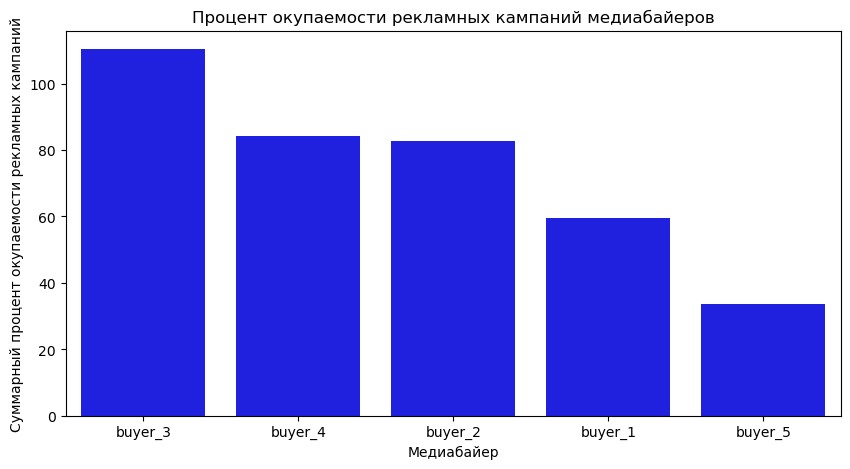

In [97]:
# Построение графика

plt.figure(figsize=(10, 5))
sns.barplot(data=data_profit, x='Buyer', y='profit_%', color = 'blue')
plt.xlabel('Медиабайер')
plt.ylabel('Суммарный процент окупаемости рекламных кампаний')
plt.title('Процент окупаемости рекламных кампаний медиабайеров')
plt.xticks()
plt.show()

### Выводы из анализа рекламных кампаний в разрезе деятельности медиабайеров


* Медиабайер №3 - лидер среди других медиабайеров. Этот медиабайер единственный из всех, кто окупил расходы на рекламные кампании и остался с прибылью (окупаемость 110%), не смотря на то, что только 33% проведённых кампаний окупились. Среднее значение ROI, рассчитанное по всем кампаниям конкретного байера, выше единицы только у одного байера - байера №3. Этот же байер работал только в одном регионе - Северной Америке.


* Медиабайер №4 - занимает второе место среди медиабайеров. Окупаемость расходов на рекламные кампании у байера - 84%, окупились 37.5% рекламных кампаний. Медиабайер провёл одну успешную кампанию в Западной Европе и пять успешных кампаний в Северной Америке. Рекламная кампания, проведённая байером в странах СНГ не окупилась.


* Медиабайер №2 - занимает третье место, немного уступая по суммарной окупаемости медиабайеру №4. Окупаемость расходов на рекламные кампании у байера - почти 83%, окупились 10% рекламных кампаний. Байер провёл три успешные кампании в Западной Европе и одну в Северной Америке. Рекламная кампания, проведённая байером в странах СНГ не окупилась.


* Медиабайер №1 - занимает четвёртое место. Окупаемость расходов на рекламные кампании у байера - 59.5%, окупились 5% рекламных кампаний. Этот медиабайер провёл самые масштабные рекламные кампании. Байер провёл только одну успешную кампанию, проводилась она в Северной Америке. Рекламные кампании, проведённые байером в странах СНГ, Латинской Америке, Тропической Африке не окупились.


* Медиабайер №5 - занимает последнее пятое место. Окупаемость расходов на рекламные кампании у байера - 33.5%, не окупилась ни одна рекламная кампания. Медиабайер №5 - лидер по количеству регионов, проводившихся рекламных кампаний: рекламные кампании в Северной Америке, Западной Европе, странах СНГ, Северной Африке, Автралии и Океании.


## Общий вывод

* В датасете представлены данные о 87-ми рекламных кампаниях, проведённых в Северной Америке (48 кампаний), Западной Европе (22 кампании), странах СНГ (10 кампаний), Латинской Америке (3 кампании), Северной Африке (2 кампании), Тропической Африке (1 кампания), Австралии и Океании (1 кампания).


* Всего на рекламные кампании было затрачено 18172.43 денежных единиц. Число регистраций в приложении: 66 908.


* Период , за который собраны данные о выручке с пользователей - 30 дней.


* Рекламные кампании окупились только в Северной Америке (успешны 14% кампаний) и Западной Европе (успешны 18% кампаний).


* Во всех регионах доля выручки от рекламы с пользователей составляет заметно большую часть: от 88% до 100%.


* Средние значения показателей успешных рекламных кампаний в Северной Америке и Западной Европе:

CTR = 2.0 - 3.2 %

CTI = 39.5 - 47.5 %

CR = 30.5 - 33.5 %

ROI = 1.36 - 1.48 %

CAC = 0.41 - 0.47 единицы


В Северной Америке произошло 46 175 регистраций в приложении.

В Западной Европе произошло 5 594 регистрации в приложении.


Эффективность рекламных кампаний прямо пропорциональна затраченным ресурсам почти во всех случаях. БОльшая часть рекламной активности была в Северной Америке - бОльшая часть кампаний, бОльшая часть показов рекламы, бОльшая часть затраченных денег привели к бОльшей конверсии в регистрации, бОльшей части регистраций в приложении, и максимальную окупаемость. 


* Рекламные кампании в странах СНГ, Латинской Америки имеют потенциал окупаемости при удержании пользователя в приложении более 30-ти дней (возможно, более 60-ти дней). Стоимость клика в Латинской Америке (САС = 0.16 единицы) в несколько раз меньше, чем в странах СНГ (САС = 0.63 единицы). Остальные значения метрик имеют соизмеримые значения.

Средние значения показателей рекламных кампаний в странах СНГ и в Латинской Америке:

CTR = 2.5 - 3.7 %

CTI = 31.0 - 36.0 %

CR = 15.0 - 18.0 %

ROI = 0.41 %


В Латинской Америке произошло 3 507 регистраций в приложении.

В странах СНГ произошло  4 069 регистраций в приложении.


* Рекламные кампании в Северной и Тропической Африке имеют слабый потенциал окупаемости (или не имеют вовсе при текущем положении, способе рекламы, типе рекламных кампаний и пр.). Однако, стоимость клика в этих регионах очень низка, а значения конверсий достаточно высоки. Вероятно, для успешной рекламы в этих регионах нужно сильно изменить маркетинговую модель.

Средние значения показателей рекламных кампаний в Северной и Тропической Африке:

CTR = 3.0 %

CTI = 28.0 - 36.0 %

CR = 18.0 - 23.0 %

ROI = 0.1 %

CAC = 0.04 - 0.09 единицы


В Северной Африке произошло  7 069 регистраций в приложении.

В Тропической Африке произошло  485 регистраций в приложении.


Рекламные кампании в Северной Африке: здесь были проведены относительно большие рекламные кампании (по числу показов), приведшие к большому числу регистраций в приложении, денег же потрачено было пропорционально меньше.


* Рекламная кампания в Австралии и Океании имеет очень слабый потенциал окупаемости (или не имеют вовсе при текущем положении, способе рекламы, типе рекламных кампаний и пр.). Стоимость клика в  регионе очень высока, а значения конверсий недостаточно высоки. Вероятно, для успешной рекламы в этом регионе нужно кардинально изменить маркетинговую модель, или отказаться на какое-то время от этого региона.

Значения показателей рекламной кампании в Австралии и Океании:

CTR = 2.00 %

CTI = 19.00 %

CR = 17.00 %

ROI = 0.05 %

CAC = 2.39 единицы


В Австралии и Океании произошло 9 регистраций в приложении.


Рекламная кампания в Австралии и Океании по масштабу сильно уступает всем остальным проведённы кампаниям.


* По прошествии 30-ти дней в Северной и Латинской Америке, Западной Европе и странах СНГ остаются платящие пользователи, их число может расти, также может расти и выручка от пользователей.

* Самые дешёвые показы рекламы в Северной Африке, далее в порядке удорожания показа рекламы следуют: Тропическая Африка, Латинская Америка, страны СНГ, Северная Америка, Западная Европа, Австралия и Океания.


* Рекламные кампании проводились пятью медиабайерами с номерами №1 - №5.


* Медиабайер №3 - лидер среди других медиабайеров. Медиабайер №3 провёл 6 рекламных кампаний. Этот медиабайер единственный из всех, кто окупил расходы на рекламные кампании и остался с прибылью (окупаемость 110%), не смотря на то, что только 33% проведённых кампаний окупились (окупились 2 из 6 кампаний). Среднее значение ROI, рассчитанное по всем кампаниям конкретного байера, выше единицы только у одного байера - байера №3. Этот же байер работал только в одном регионе - Северной Америке.


* Медиабайер №4 - занимает второе место среди медиабайеров. Медиабайер №4 провёл 16 рекламных кампаний. Окупаемость расходов на рекламные кампании у байера - 84%, окупились 37.5% рекламных кампаний (окупились 6 из 16 кампаний). Медиабайер провёл одну успешную кампанию в Западной Европе и пять успешных кампаний в Северной Америке.


* Медиабайер №2 - занимает третье место, немного уступая по суммарной окупаемости медиабайеру №4. Медиабайер №2 провёл большее число рекламных кампаний - 39 кампаний. Окупаемость расходов на рекламные кампании у байера - почти 83%, окупились 10% рекламных кампаний (окупились 4 из 39 кампаний). Байер провёл три успешные кампании в Западной Европе и одну в Северной Америке. 


* Медиабайер №1 - занимает четвёртое место. Медиабайер №1 провёл 18 рекламных кампаний. Окупаемость расходов на рекламные кампании у байера - 59.5%, окупились 5% рекламных кампаний (окупилась 1 из 18 кампаний). Этот медиабайер провёл самые масштабные рекламные кампании:  бОльшую долю в показах рекламы - почти 63%; доля в затратах на рекламу - почти 40%; 60% (более 40 тысяч) регистраций пользователей пришлось на медиабайера №1. Байер провёл только одну успешную кампанию, проводилась она в Северной Америке. 


* Медиабайер №5 - занимает последнее пятое место. Медиабайер №5 провёл 8 рекламных кампаний. Окупаемость расходов на рекламные кампании у байера - 33.5%, не окупилась ни одна рекламная кампания. Медиабайер №5 - лидер по количеству регионов, в которых проводились рекламные кампании. 


* Рекламные кампании в Латинской Америке, в странах СНГ, Северной Африке, Тропической Африке, Автралии и Океании не окупились ни у одного медиабайера. Ни один медиабайер не проводил рекламные кампании во всех регионах. Только один медиабайер (№3) проводил кампании толко в одном регионе.
